In [54]:
import pandas as pd
import numpy as np
print("Data Preparation 'a':")
print("     ")

# Read the selected data
df = pd.read_excel('/Users/AnanyaPal1/Documents/Certifications & Applications/Analysis-of-Oncological-Cancer-Screening-in-Latvia-/survey_data/survey_data.xlsx')
# list the fields/variables
display(df.head())
# identifing their types
display(df.dtypes)

print("     ")
print("Data Preparation 'b':")

print("     ")
print('Outliers:')
print("     ")

Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
# Identify outliers
outliers = df[(df['Age'] < Q1 - 1.5 * IQR) | (df['Age'] > Q3 + 1.5 * IQR)]
# List the outliers
print("Outliers in 'Age':")
print(outliers[['Age']])
# Remove outliers from 'Age' column
print("  After Fixing the Outliers:   ")
df = df[~((df['Age'] < Q1 - 1.5 * IQR) | (df['Age'] > Q3 + 1.5 * IQR))]
display(df.head())

Q1 = df['Number of children'].quantile(0.25)
Q3 = df['Number of children'].quantile(0.75)
IQR = Q3 - Q1
# Identify outliers
outliers = df[(df['Number of children'] < Q1 - 1.5 * IQR) | (df['Age'] > Q3 + 1.5 * IQR)]
# List the outliers
print("Outliers in 'Number of children':")
print(outliers[['Number of children']])
# Remove outliers from 'Number of children' column
print("  After Fixing the Outliers:   ")
df = df[~((df['Number of children'] < Q1 - 1.5 * IQR) | (df['Number of children'] > Q3 + 1.5 * IQR))]
display(df.head())

print("     ")
print('Missing data:')
print("     ")

# List of columns for which you want to impute missing data
columns_to_impute = ['Age',
                     ' Established diagnosis of breast cancer, cervical cancer, colorectal cancer, prostate cancer',
                     'Gender','City/town/village',
                     'Marital Status','Number of children',
                     'Highest level of school completed',
                     'Occupation', 
                     'Employment status', 'Smoking status', 
                     'Daily alcohol consumption ',
                     'Exercise frequency',
                     'Knowledge of General Practitioner',
                     'Last visit to General Practitioner',
                     'Health check-up frequency',
                     'For women only: last visit to gynaecologist']

# List Missing data before the Imputing
columns_with_missing_data = df[columns_to_impute].columns[df[columns_to_impute].isnull().any()]
print("Columns with missing data:")
print(columns_with_missing_data)

for column in columns_to_impute:
    if column in df.columns:  # Check if column exists in DataFrame
        if df[column].dtype == 'float64' or df[column].dtype == 'int64':
            # Impute missing values with mean for numerical columns
            df[column] = df[column].fillna(df[column].mean())
            if column == 'Number of children':
                df[column] = df[column].round()  # Round to the nearest integer
        elif df[column].dtype == 'object':
            # Impute missing values with mode for categorical columns
            most_frequent_value = df[column].mode()[0]
            df[column] = df[column].fillna(most_frequent_value)
    else:
        print(f"Column '{column}' not found in DataFrame.")

# Check if there are still any missing values
print("Columns with missing data after imputation:")
print(df[columns_to_impute].columns[df[columns_to_impute].isnull().any()])

# Convert age column to integer after imputation
df['Age'] = df['Age'].astype(int)

print("  After Fixing the Missing Data:   ")
display(df.head())

# Save the cleaned DataFrame to a new CSV file
df.to_csv('cleaned_data.csv', index=False)


Data Preparation 'a':
     


,Country Code,Region,Age,"Established diagnosis of breast cancer, cervical cancer, colorectal cancer, prostate cancer",Gender,City/town/village,Marital Status,Number of children,Highest level of school completed,Occupation,...,Did NOT attend state-provided cancer screenings because I forgot to schedule/attend the appointment,Did NOT attend state-provided cancer screenings because I am fearful of receiving a positive cancer screening result and the potential implications it may have on my life,Did NOT attend state-provided cancer screenings because I am concerned that cancer screening may result in false-positive results or unnecessary follow-up procedures,Did NOT attend state-provided cancer screenings because I am not aware of the recommended guidelines or frequency for attending cancer screening,Did NOT attend state-provided cancer screenings because I have not received sufficient information or education about cancer screening from healthcare providers or public health sources,Motivation preference for attending medical screenings is personalised reminders and notifications,Motivation preference for attending medical screenings is rewards for participation,"Motivation preference for attending medical screenings is flyers, posters, etc. in healthcare institutiona and in public places","Motivation preference for attending medical screenings is information in social media (websites, news portals, newspapers and similar)","Motivation preference for attending medical screenings is ""Motivation interviewing"" by GP or other healthcare providers"
0,DE,NW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LV,RIX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LV,RIX,48.0,No,Male,Rīga,Married or living with a partner,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LV,JEL,23.0,No,Male,Riga,Marital Status,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,UA,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Country Code                                                                                                                                object
Region                                                                                                                                      object
Age                                                                                                                                        float64
 Established diagnosis of breast cancer, cervical cancer, colorectal cancer, prostate cancer                                                object
Gender                                                                                                                                      object
                                                                                                                                            ...   
Motivation preference for attending medical screenings is personalised reminders and notifications                    

     
Data Preparation 'b':
     
Outliers:
     
Outliers in 'Age':
Empty DataFrame
Columns: [Age]
Index: []
  After Fixing the Outliers:   


,Country Code,Region,Age,"Established diagnosis of breast cancer, cervical cancer, colorectal cancer, prostate cancer",Gender,City/town/village,Marital Status,Number of children,Highest level of school completed,Occupation,...,Did NOT attend state-provided cancer screenings because I forgot to schedule/attend the appointment,Did NOT attend state-provided cancer screenings because I am fearful of receiving a positive cancer screening result and the potential implications it may have on my life,Did NOT attend state-provided cancer screenings because I am concerned that cancer screening may result in false-positive results or unnecessary follow-up procedures,Did NOT attend state-provided cancer screenings because I am not aware of the recommended guidelines or frequency for attending cancer screening,Did NOT attend state-provided cancer screenings because I have not received sufficient information or education about cancer screening from healthcare providers or public health sources,Motivation preference for attending medical screenings is personalised reminders and notifications,Motivation preference for attending medical screenings is rewards for participation,"Motivation preference for attending medical screenings is flyers, posters, etc. in healthcare institutiona and in public places","Motivation preference for attending medical screenings is information in social media (websites, news portals, newspapers and similar)","Motivation preference for attending medical screenings is ""Motivation interviewing"" by GP or other healthcare providers"
0,DE,NW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LV,RIX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LV,RIX,48.0,No,Male,Rīga,Married or living with a partner,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LV,JEL,23.0,No,Male,Riga,Marital Status,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,UA,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Outliers in 'Number of children':
     Number of children
2                   NaN
3                   NaN
5                   NaN
6                   0.0
7                   0.0
..                  ...
114                 0.0
115                 2.0
117                 0.0
118                 0.0
119                 0.0

[108 rows x 1 columns]
  After Fixing the Outliers:   


,Country Code,Region,Age,"Established diagnosis of breast cancer, cervical cancer, colorectal cancer, prostate cancer",Gender,City/town/village,Marital Status,Number of children,Highest level of school completed,Occupation,...,Did NOT attend state-provided cancer screenings because I forgot to schedule/attend the appointment,Did NOT attend state-provided cancer screenings because I am fearful of receiving a positive cancer screening result and the potential implications it may have on my life,Did NOT attend state-provided cancer screenings because I am concerned that cancer screening may result in false-positive results or unnecessary follow-up procedures,Did NOT attend state-provided cancer screenings because I am not aware of the recommended guidelines or frequency for attending cancer screening,Did NOT attend state-provided cancer screenings because I have not received sufficient information or education about cancer screening from healthcare providers or public health sources,Motivation preference for attending medical screenings is personalised reminders and notifications,Motivation preference for attending medical screenings is rewards for participation,"Motivation preference for attending medical screenings is flyers, posters, etc. in healthcare institutiona and in public places","Motivation preference for attending medical screenings is information in social media (websites, news portals, newspapers and similar)","Motivation preference for attending medical screenings is ""Motivation interviewing"" by GP or other healthcare providers"
0,DE,NW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LV,RIX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LV,RIX,48.0,No,Male,Rīga,Married or living with a partner,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LV,JEL,23.0,No,Male,Riga,Marital Status,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,UA,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


     
Missing data:
     
Columns with missing data:
Index(['Age',
       ' Established diagnosis of breast cancer, cervical cancer, colorectal cancer, prostate cancer',
       'Gender', 'City/town/village', 'Marital Status', 'Number of children',
       'Highest level of school completed', 'Occupation', 'Employment status',
       'Smoking status', 'Daily alcohol consumption ', 'Exercise frequency',
       'Knowledge of General Practitioner',
       'Last visit to General Practitioner', 'Health check-up frequency',
       'For women only: last visit to gynaecologist'],
      dtype='object')
Columns with missing data after imputation:
Index([], dtype='object')
  After Fixing the Missing Data:   


,Country Code,Region,Age,"Established diagnosis of breast cancer, cervical cancer, colorectal cancer, prostate cancer",Gender,City/town/village,Marital Status,Number of children,Highest level of school completed,Occupation,...,Did NOT attend state-provided cancer screenings because I forgot to schedule/attend the appointment,Did NOT attend state-provided cancer screenings because I am fearful of receiving a positive cancer screening result and the potential implications it may have on my life,Did NOT attend state-provided cancer screenings because I am concerned that cancer screening may result in false-positive results or unnecessary follow-up procedures,Did NOT attend state-provided cancer screenings because I am not aware of the recommended guidelines or frequency for attending cancer screening,Did NOT attend state-provided cancer screenings because I have not received sufficient information or education about cancer screening from healthcare providers or public health sources,Motivation preference for attending medical screenings is personalised reminders and notifications,Motivation preference for attending medical screenings is rewards for participation,"Motivation preference for attending medical screenings is flyers, posters, etc. in healthcare institutiona and in public places","Motivation preference for attending medical screenings is information in social media (websites, news portals, newspapers and similar)","Motivation preference for attending medical screenings is ""Motivation interviewing"" by GP or other healthcare providers"
0,DE,NW,46,No,Male,Riga,Married or living with a partner,1.0,"Higher education (bachelor, masters)",White collars (office work),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LV,RIX,46,No,Male,Riga,Married or living with a partner,1.0,"Higher education (bachelor, masters)",White collars (office work),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LV,RIX,48,No,Male,Rīga,Married or living with a partner,1.0,"Higher education (bachelor, masters)",White collars (office work),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LV,JEL,23,No,Male,Riga,Marital Status,1.0,"Higher education (bachelor, masters)",White collars (office work),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,UA,30,46,No,Male,Riga,Married or living with a partner,1.0,"Higher education (bachelor, masters)",White collars (office work),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# Answering study questions

In [56]:
all_columns = df.columns.tolist()
print(all_columns)

['Country Code', 'Region', 'Age', ' Established diagnosis of breast cancer, cervical cancer, colorectal cancer, prostate cancer', 'Gender', 'City/town/village', 'Marital Status', 'Number of children', 'Highest level of school completed', 'Occupation', 'Employment status', 'Smoking status', 'Daily alcohol consumption ', 'Exercise frequency', 'Knowledge of General Practitioner', 'Last visit to General Practitioner', 'Health check-up frequency', 'For women only: last visit to gynaecologist', 'Familiarity with the concept of cancer screening in Latvia', 'Awareness about screening for cervical cancer (PAP smear)', 'Awareness about screening for colorectal cancer (blood in faeces)', ' Awareness about screening for breast cancer (Mammography)', 'Awareness about screening for prostate cancer (PSA analysis) ', 'Awareness about screening for Colonoscopy', 'Awareness about Prostate examination ', 'No Awareness about any type of cancer screening', 'Attended screening for cervical cancer (PAP smear

'Awareness participation rate:'

0.37606837606837606

'Awareness non-participation rate:'

0.2905982905982906

'Inference: Awareness participate rate- This indicates that approximately 37.6% of respondents who are aware of cancer screening in Latvia have participated in screenings. In other words, out of all respondents who are aware of cancer screening, around 37.6% have undergone cancer screenings.'

'Awareness non-participation rate- This suggests that approximately 29.1% of respondents who are aware of cancer screening in Latvia have not participated in screenings. In other words, out of all respondents who are aware of cancer screening, around 29.1% have not undergone cancer screenings.'

<Figure size 1400x1000 with 0 Axes>

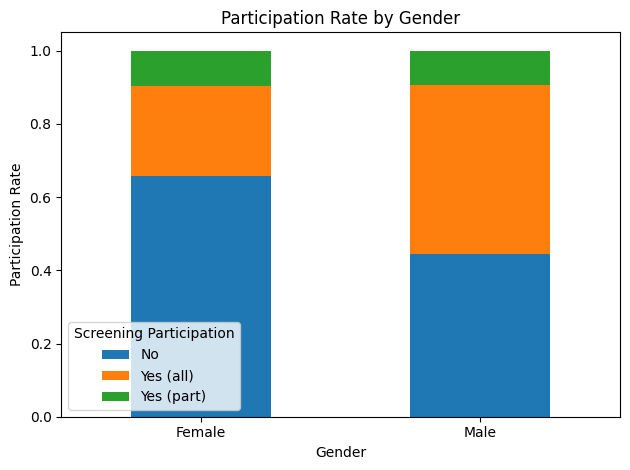

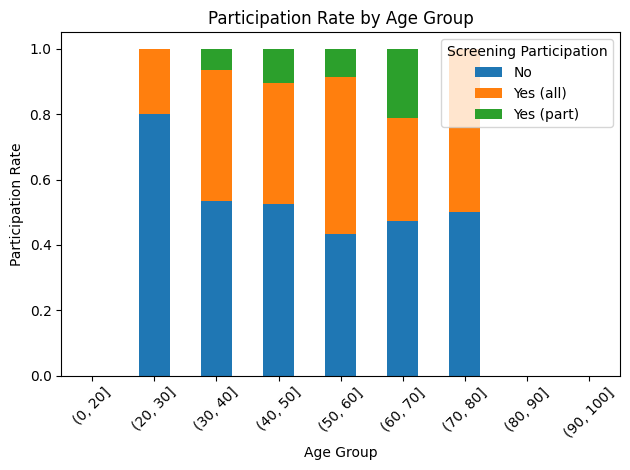

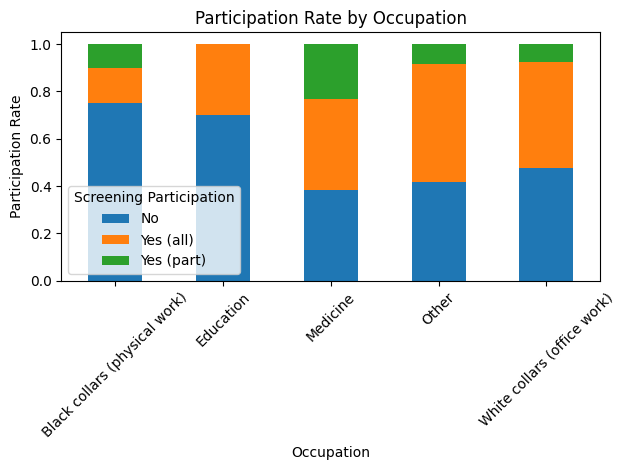

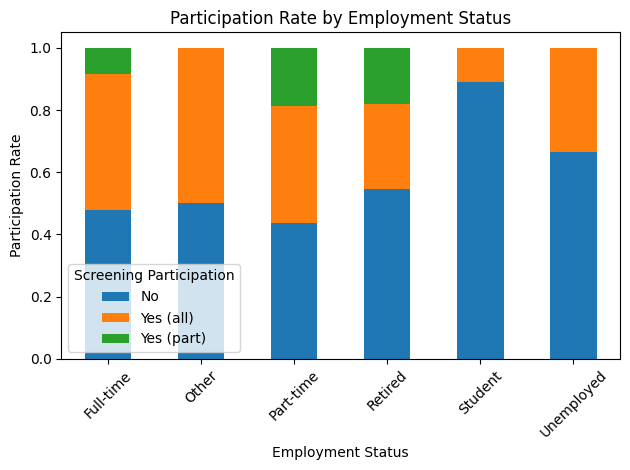

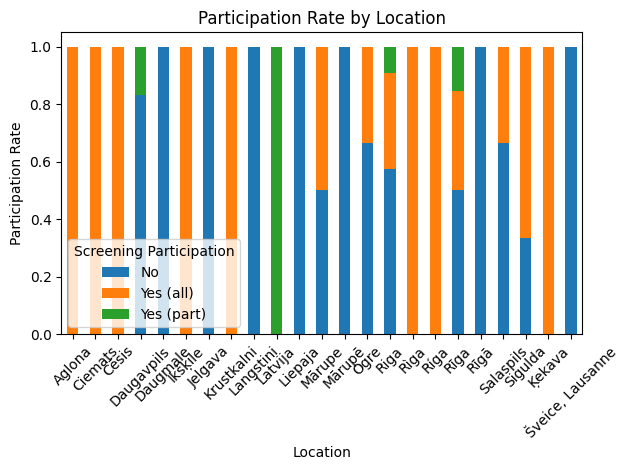

In [57]:
# Question-1 
# Does awareness about state-funded cancer screenings affect participation in populational screening in Latvia?

## Questions from the survey which can be used to answer the question
# Q17: Are you familiar with the concept of cancer screening in Latvia? (Yes/No)
# Q18: What types of cancer screening are you aware of? (Multiple-choice)
# Q19: Which of the following cancer screenings have you attended in the last year? (Multiple-choice)
# Q20: What sources have you used to learn about cancer screening tests? (Multiple-choice)
## Participation in Cancer Screening:
# Q25: If you received invitations for screenings, did you perform the screening? (Yes/No)
# Demographic and Socioeconomic Factors:
# Q1: What is your age? (Continuous)
# Q3: What is your gender? (Male/Female/Other)
# Q4: Where do you live? (City/Town/Village)
# Q8: What is your occupation? (Multiple-choice)
# Q9: What is your employment status? (Multiple-choice)
# Q13: Do you know who your general practitioner is? (Yes/No)


# Load the cleaned dataset
df = pd.read_csv('cleaned_data.csv')

# Select relevant columns
relevant_columns = [
    'Age', 
    'Gender', 
    'City/town/village', 
    'Occupation', 
    'Employment status',
    'Familiarity with the concept of cancer screening in Latvia',
    'Awareness about screening for cervical cancer (PAP smear)', 
    'Awareness about screening for colorectal cancer (blood in faeces)', 
    ' Awareness about screening for breast cancer (Mammography)', 
    'Awareness about screening for prostate cancer (PSA analysis) ', 
    'Awareness about screening for Colonoscopy', 
    'Awareness about Prostate examination ', 
    'No Awareness about any type of cancer screening',
    'Attended screening for cervical cancer (PAP smear) in the last year', 
    'Attended screening for CRC in the last year ', 
    'Attended screening for breast cancer in the last year', 
    'Attended screening for prostate cancer in the last year', 
    'Attended screening for colonoscopy in the last year ', 
    'Attended screening for prostate in the last year',
    'Not attended any cancer screening in the past year',
    'Learnt about canceer screening tests from the Internet- Self-seeking information ', 
    'Learnt about canceer screening tests from social media ', 
    'Learnt about canceer screening tests by my GP ', 
    'Learnt about canceer screening tests from advertisements ', 
    'Learnt about canceer screening tests from other resources ',
    'Have you received an invitation letter for cervical cancer screening during last year? ', 
    'Have you received an invitation letter for mammogrpahy during last year?', 
    'Did your GP offer you a faecal-occult blood test during the last year? ', 
    'Did your GP offer you a prostate examination during last year? ', 
    'If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '
]

data = df[relevant_columns]

# Analyze the relationship between awareness and participation
# Count the number of respondents who are aware, have participated in screenings, and their sociodemographic characteristics
aware_participated = data[(data['Familiarity with the concept of cancer screening in Latvia'] == 'Yes') & 
                          (data['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].isin(['Yes - for all the screenings that I received the invitations', 'Yes for a part of screenings that I received the invitations']))]
aware_not_participated = data[(data['Familiarity with the concept of cancer screening in Latvia'] == 'Yes') & 
                              (data['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '] == 'No')]

# Calculate proportions for different sociodemographic groups
total_responses = data.shape[0]
aware_participation_rate = len(aware_participated) / total_responses
aware_non_participation_rate = len(aware_not_participated) / total_responses

# Display results
display("Awareness participation rate:", aware_participation_rate)
display("Awareness non-participation rate:", aware_non_participation_rate)

display("Inference: Awareness participate rate- This indicates that approximately 37.6% of respondents who are aware of cancer screening in Latvia have participated in screenings. In other words, out of all respondents who are aware of cancer screening, around 37.6% have undergone cancer screenings.")
display("Awareness non-participation rate- This suggests that approximately 29.1% of respondents who are aware of cancer screening in Latvia have not participated in screenings. In other words, out of all respondents who are aware of cancer screening, around 29.1% have not undergone cancer screenings.")

" Visualization:  "

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))

# Define mapping for the response options
response_mapping = {
    "Yes - for all the screenings that I received the invitations": "Yes (all)",
    "Yes for a part of screenings that I received the invitations": "Yes (part)",
    "No": "No"
}

# Make a copy of the DataFrame
data_copy = data.copy()

# Map the responses in the copied DataFrame
data_copy['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '] = data_copy['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].map(response_mapping)

# Plot participation rate by gender
gender_participation = data_copy.groupby('Gender')['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].value_counts(normalize=True).unstack()
gender_participation.plot(kind='bar', stacked=True)
plt.title('Participation Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Participation Rate')
plt.xticks(rotation=0)
plt.legend(title='Screening Participation')
plt.tight_layout()
plt.show()

# Plot participation rate by age group
age_participation = data_copy.groupby(pd.cut(data_copy['Age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100]), observed=False)['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].value_counts(normalize=True).unstack()
age_participation.plot(kind='bar', stacked=True)
plt.title('Participation Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Participation Rate')
plt.xticks(rotation=45)
plt.legend(title='Screening Participation')
plt.tight_layout()
plt.show()

# Plot participation rate by occupation
occupation_participation = data_copy.groupby('Occupation')['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].value_counts(normalize=True).unstack()
occupation_participation.plot(kind='bar', stacked=True)
plt.title('Participation Rate by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Participation Rate')
plt.xticks(rotation=45)
plt.legend(title='Screening Participation')
plt.tight_layout()
plt.show()

# Plot participation rate by employment status
employment_participation = data_copy.groupby('Employment status')['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].value_counts(normalize=True).unstack()
employment_participation.plot(kind='bar', stacked=True)
plt.title('Participation Rate by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Participation Rate')
plt.xticks(rotation=45)
plt.legend(title='Screening Participation')
plt.tight_layout()
plt.show()

# Plot participation rate by city/town/village
location_participation = data_copy.groupby('City/town/village')['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].value_counts(normalize=True).unstack()
location_participation.plot(kind='bar', stacked=True)
plt.title('Participation Rate by Location')
plt.xlabel('Location')
plt.ylabel('Participation Rate')
plt.xticks(rotation=45)
plt.legend(title='Screening Participation')
plt.tight_layout()
plt.show()


'Difference in awareness rates between genders:'

-0.08358848744641756

'Difference in participation rates between genders:'

-0.09854423292273229

'Difference in awareness rates between genders: -0.0836 means that the awareness rate among one gender (presumably females, as they are often more aware of healthcare issues) is approximately 8.36% lower than the awareness rate among the other gender (presumably males). This negative value suggests that one gender is less aware of cancer screening concepts in Latvia compared to the other gender.'

'Difference in participation rates between genders: -0.0985 means that the participation rate among one gender is approximately 9.85% lower than the participation rate among the other gender. This negative value indicates that one gender participates less in cancer screenings in Latvia compared to the other gender.'

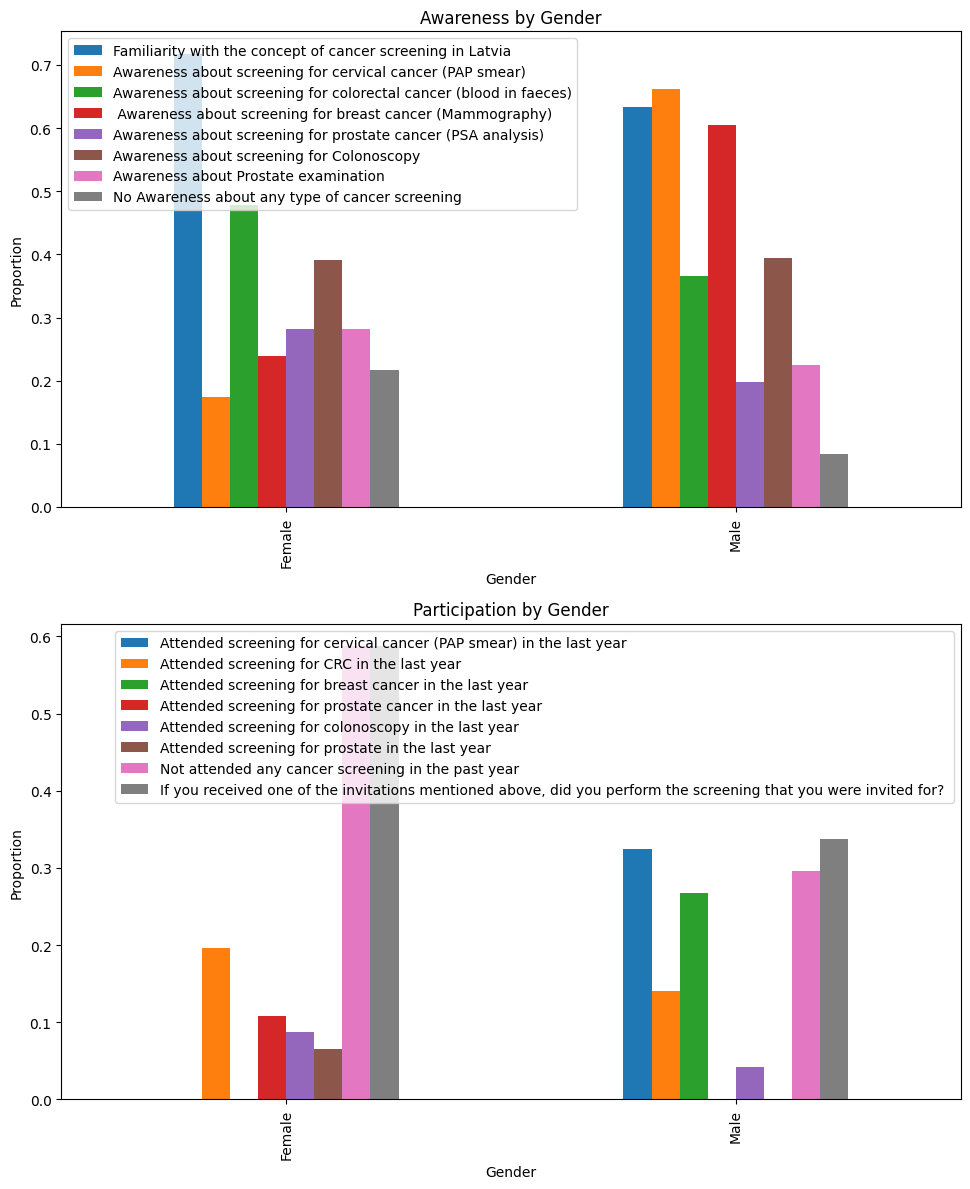

In [58]:
# Research Question : Are there any gender differences in awareness towards the screening and in participation rates in populational screening in Latvia?

# Load the cleaned dataset
df = pd.read_csv('cleaned_data.csv')

# Define mapping for 'If you received one of the invitations mentioned above, did you perform the screening that you were invited for?' column
response_mapping = {
    "Yes - for all the screenings that I received the invitations": "Yes_All",
    "Yes for a part of screenings that I received the invitations": "Yes_Part",
    "No": "No"
}

# Apply mapping to the column
df['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '] = df['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].map(response_mapping)


# Select relevant columns
relevant_columns = [
    'Gender',
    'Familiarity with the concept of cancer screening in Latvia',
    'Awareness about screening for cervical cancer (PAP smear)', 
    'Awareness about screening for colorectal cancer (blood in faeces)', 
    ' Awareness about screening for breast cancer (Mammography)', 
    'Awareness about screening for prostate cancer (PSA analysis) ', 
    'Awareness about screening for Colonoscopy', 
    'Awareness about Prostate examination ', 
    'No Awareness about any type of cancer screening',
    'Attended screening for cervical cancer (PAP smear) in the last year', 
    'Attended screening for CRC in the last year ', 
    'Attended screening for breast cancer in the last year', 
    'Attended screening for prostate cancer in the last year', 
    'Attended screening for colonoscopy in the last year ', 
    'Attended screening for prostate in the last year',
    'Not attended any cancer screening in the past year',
    'Learnt about canceer screening tests from the Internet- Self-seeking information ', 
    'Learnt about canceer screening tests from social media ', 
    'Learnt about canceer screening tests by my GP ', 
    'Learnt about canceer screening tests from advertisements ', 
    'Learnt about canceer screening tests from other resources ',
    'Have you received an invitation letter for cervical cancer screening during last year? ', 
    'Have you received an invitation letter for mammogrpahy during last year?', 
    'Did your GP offer you a faecal-occult blood test during the last year? ', 
    'Did your GP offer you a prostate examination during last year? ', 
    'If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '
]

# Select relevant data
data = df[relevant_columns]

# Analyze gender differences in awareness and participation rates

# Define a function to calculate participation rates based on the specific entries
def calculate_participation_rate(series):
    # Count the number of 'Yes' and 'No' entries
    yes_count = series.str.contains('Yes').sum()
    no_count = series.str.contains('No').sum()
    
    # Calculate the total count excluding 'No'
    total_count = len(series) - no_count
    
    # Calculate the participation rate
    participation_rate = yes_count / total_count if total_count > 0 else 0
    
    return participation_rate

# Calculate awareness rates by gender
awareness_by_gender = data.groupby('Gender')['Familiarity with the concept of cancer screening in Latvia'].apply(lambda x: (x == 'Yes').mean())

# Calculate participation rates by gender
participation_by_gender = data.groupby('Gender')['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].apply(calculate_participation_rate)

# Calculate the absolute difference in awareness and participation rates between genders
awareness_difference = awareness_by_gender.diff().iloc[-1]
participation_difference = participation_by_gender.diff().iloc[-1]

# Display the results
display("Difference in awareness rates between genders:", awareness_difference)
display("Difference in participation rates between genders:", participation_difference)

"   "
" Inference of the result: "
"   "

display("Difference in awareness rates between genders: -0.0836 means that the awareness rate among one gender (presumably females, as they are often more aware of healthcare issues) is approximately 8.36% lower than the awareness rate among the other gender (presumably males). This negative value suggests that one gender is less aware of cancer screening concepts in Latvia compared to the other gender.")
display("Difference in participation rates between genders: -0.0985 means that the participation rate among one gender is approximately 9.85% lower than the participation rate among the other gender. This negative value indicates that one gender participates less in cancer screenings in Latvia compared to the other gender.")

# Awareness by gender
awareness_by_gender = data.groupby('Gender').agg({
    'Familiarity with the concept of cancer screening in Latvia': lambda x: (x == 'Yes').mean(),
    'Awareness about screening for cervical cancer (PAP smear)': lambda x: (x == 'Yes').mean(),
    'Awareness about screening for colorectal cancer (blood in faeces)': lambda x: (x == 'Yes').mean(),
    ' Awareness about screening for breast cancer (Mammography)': lambda x: (x == 'Yes').mean(),
    'Awareness about screening for prostate cancer (PSA analysis) ': lambda x: (x == 'Yes').mean(),
    'Awareness about screening for Colonoscopy': lambda x: (x == 'Yes').mean(),
    'Awareness about Prostate examination ': lambda x: (x == 'Yes').mean(),
    'No Awareness about any type of cancer screening': lambda x: (x == 'Yes').mean()
}).reset_index()

# Participation by gender
participation_by_gender = data.groupby('Gender').agg({
    'Attended screening for cervical cancer (PAP smear) in the last year': lambda x: (x == 'Yes').mean(),
    'Attended screening for CRC in the last year ': lambda x: (x == 'Yes').mean(),
    'Attended screening for breast cancer in the last year': lambda x: (x == 'Yes').mean(),
    'Attended screening for prostate cancer in the last year': lambda x: (x == 'Yes').mean(),
    'Attended screening for colonoscopy in the last year ': lambda x: (x == 'Yes').mean(),
    'Attended screening for prostate in the last year': lambda x: (x == 'Yes').mean(),
    'Not attended any cancer screening in the past year': lambda x: (x == 'Yes').mean(),
    'If you received one of the invitations mentioned above, did you perform the screening that you were invited for? ': lambda x: (x == 'Yes_All').mean(),
    'If you received one of the invitations mentioned above, did you perform the screening that you were invited for? ': lambda x: (x == 'Yes_Part').mean(),
    'If you received one of the invitations mentioned above, did you perform the screening that you were invited for? ': lambda x: (x == 'No').mean()
}).reset_index()

# Visualize the results
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Awareness plot
awareness_by_gender.plot(kind='bar', x='Gender', ax=axes[0], title='Awareness by Gender')
axes[0].set_ylabel('Proportion')
axes[0].set_xlabel('Gender')

# Participation plot
participation_by_gender.plot(kind='bar', x='Gender', ax=axes[1], title='Participation by Gender')
axes[1].set_ylabel('Proportion')
axes[1].set_xlabel('Gender')

plt.tight_layout()
plt.show()


In [59]:
all_columns = df.columns.tolist()
print(all_columns)

print(data['Gender'].unique())


['Country Code', 'Region', 'Age', ' Established diagnosis of breast cancer, cervical cancer, colorectal cancer, prostate cancer', 'Gender', 'City/town/village', 'Marital Status', 'Number of children', 'Highest level of school completed', 'Occupation', 'Employment status', 'Smoking status', 'Daily alcohol consumption ', 'Exercise frequency', 'Knowledge of General Practitioner', 'Last visit to General Practitioner', 'Health check-up frequency', 'For women only: last visit to gynaecologist', 'Familiarity with the concept of cancer screening in Latvia', 'Awareness about screening for cervical cancer (PAP smear)', 'Awareness about screening for colorectal cancer (blood in faeces)', ' Awareness about screening for breast cancer (Mammography)', 'Awareness about screening for prostate cancer (PSA analysis) ', 'Awareness about screening for Colonoscopy', 'Awareness about Prostate examination ', 'No Awareness about any type of cancer screening', 'Attended screening for cervical cancer (PAP smear

In [60]:
# Research Question - •	Do sociodemographic factors affect the attitude towards screening and participation in screenings in Latvia? 

# Numerical Analysis 

import pandas as pd
from scipy.stats import chi2_contingency

# Load the cleaned dataset
df = pd.read_csv('cleaned_data.csv')

# Select relevant columns for analysis
relevant_columns = ['Age', 
                    'Gender', 
                    'City/town/village', 
                    'Marital Status', 
                    'Number of children', 
                    'Highest level of school completed', 
                    'Occupation', 
                    'Employment status', 
                    'Smoking status', 
                    'Daily alcohol consumption ', 
                    'Exercise frequency', 
                    'Last visit to General Practitioner', 
                    'Health check-up frequency', 
                    'For women only: last visit to gynaecologist', 
                    'Familiarity with the concept of cancer screening in Latvia', 
                    'If you received one of the invitations mentioned above, did you perform the screening that you were invited for? ']

data = df[relevant_columns]

# Map the participation column
def map_participation(entry):
    if entry == 'Yes - for all the screenings that I received the invitations':
        return 2
    elif entry == 'Yes for a part of screenings that I received the invitations':
        return 1
    else:
        return 0

data['Participation'] = data['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].map(map_participation)

# Convert categorical variables to dummy variables
data = pd.get_dummies(data, drop_first=True)

# Statistical Analysis
def statistical_analysis():
    # Conduct chi-square tests for awareness and participation
    chi2_awareness, p_awareness = chi2_contingency(pd.crosstab(data['Gender'], data['Familiarity with the concept of cancer screening in Latvia']))
    chi2_participation, p_participation = chi2_contingency(pd.crosstab(data['Gender'], data['Participation']))

    # Print the results
    print("Chi-square test results for Awareness:")
    print("Chi-square value:", chi2_awareness)
    print("p-value:", p_awareness)
    print("\nChi-square test results for Participation:")
    print("Chi-square value:", chi2_participation)
    print("p-value:", p_participation)

# Call the statistical analysis function
statistical_analysis()


/var/folders/00/g6wzklhx6nj9649_f1shk6lc0000gp/T/ipykernel_33796/1796672290.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Participation'] = data['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].map(map_participation)


KeyError: 'Gender'

/var/folders/00/g6wzklhx6nj9649_f1shk6lc0000gp/T/ipykernel_32765/80319664.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '] = data['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].map(map_participation)


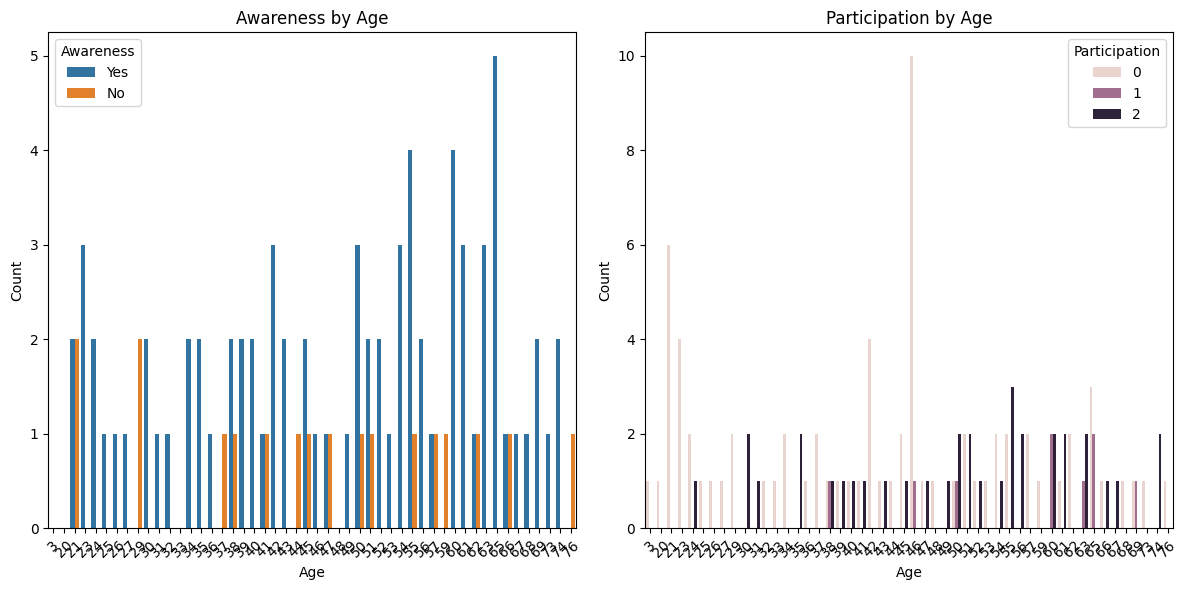

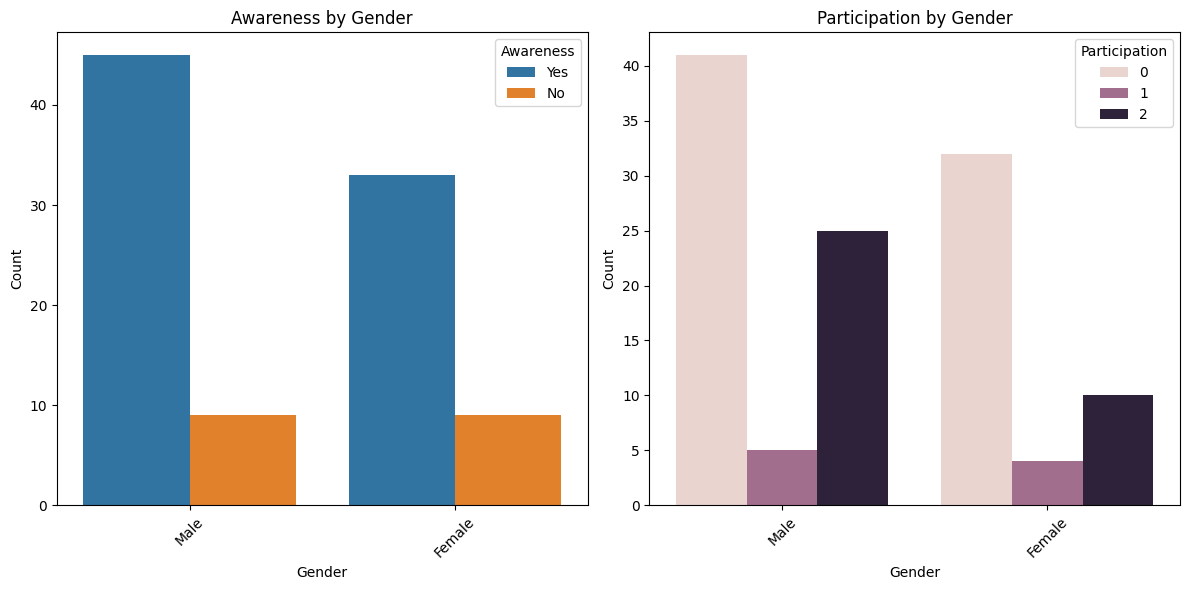

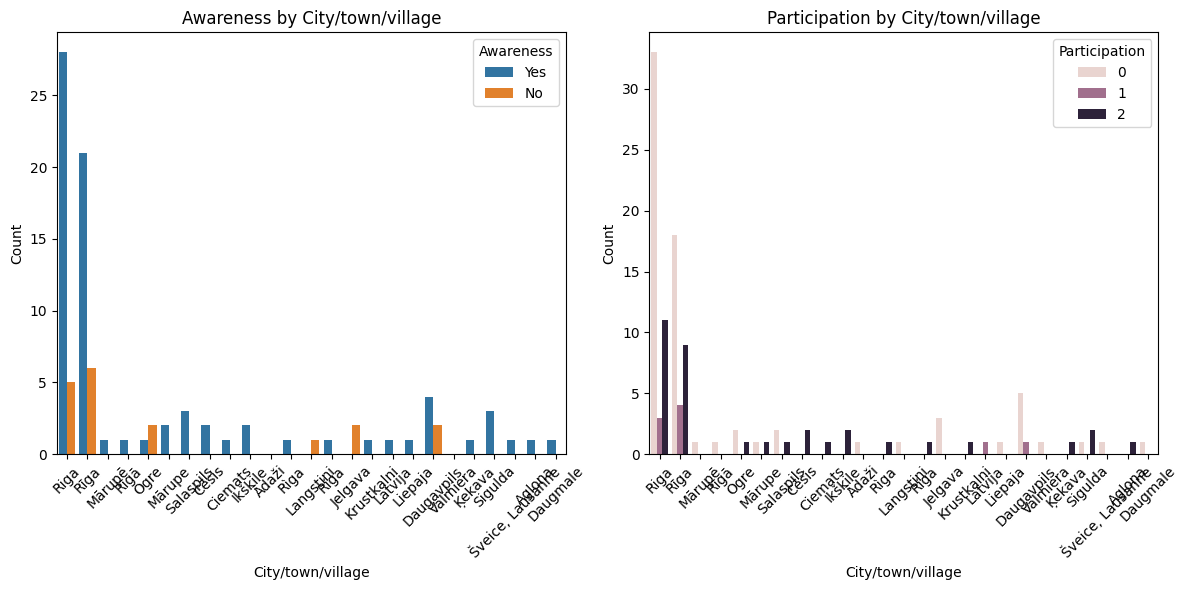

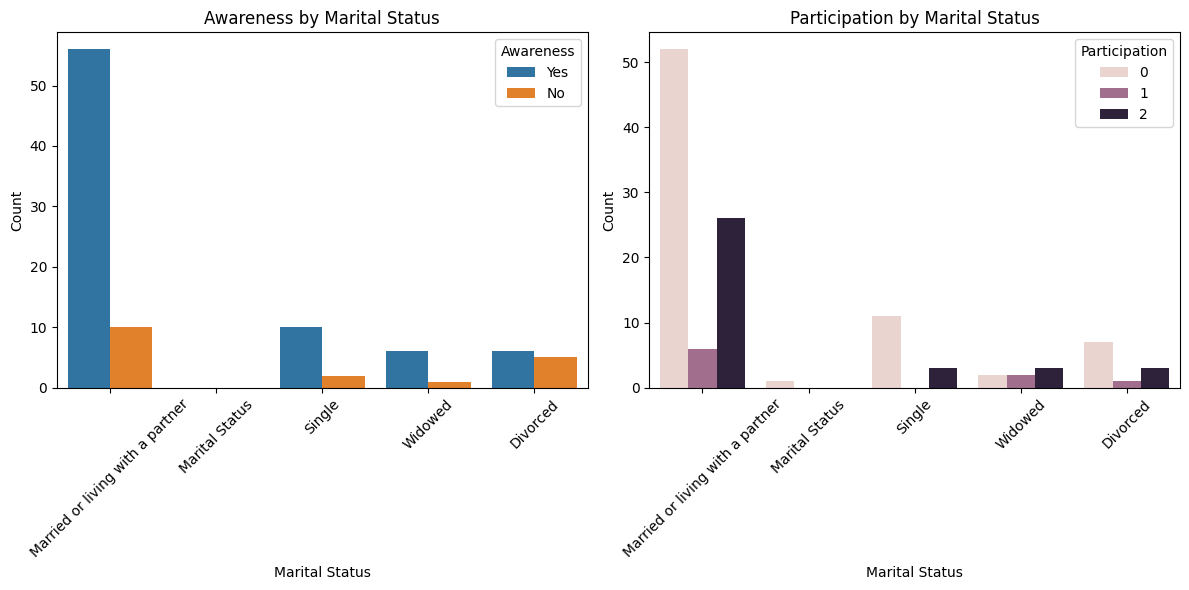

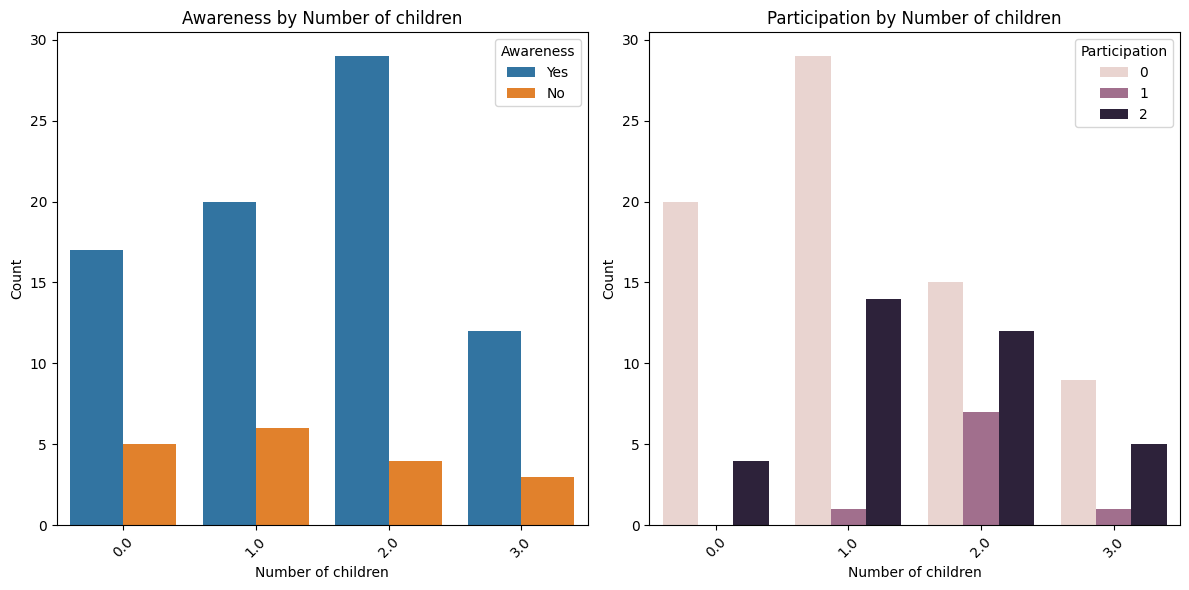

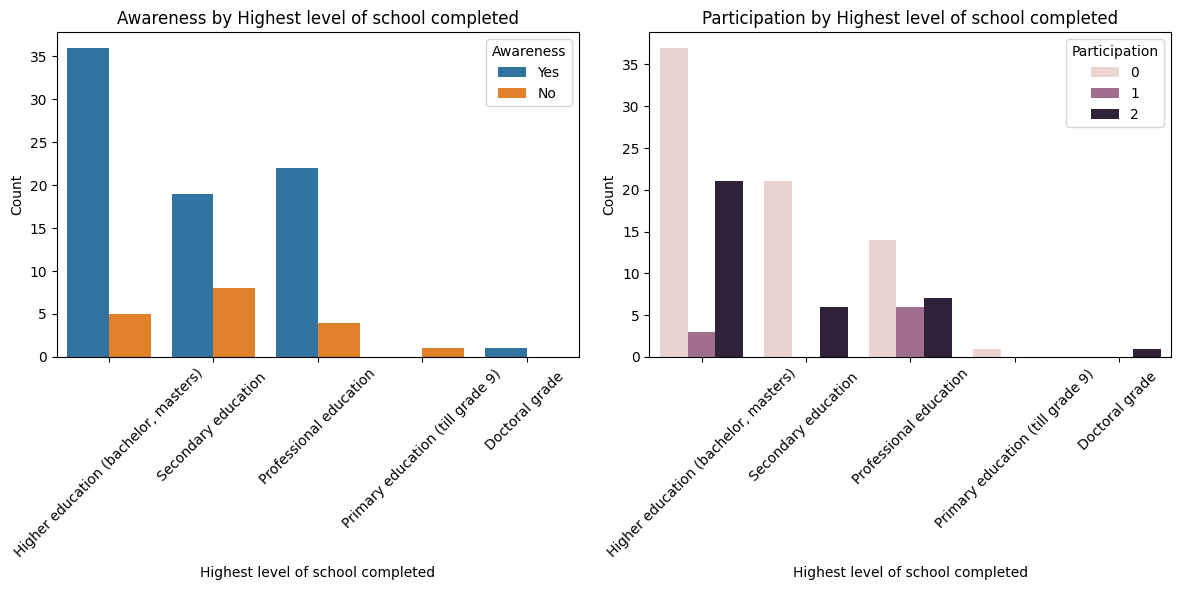

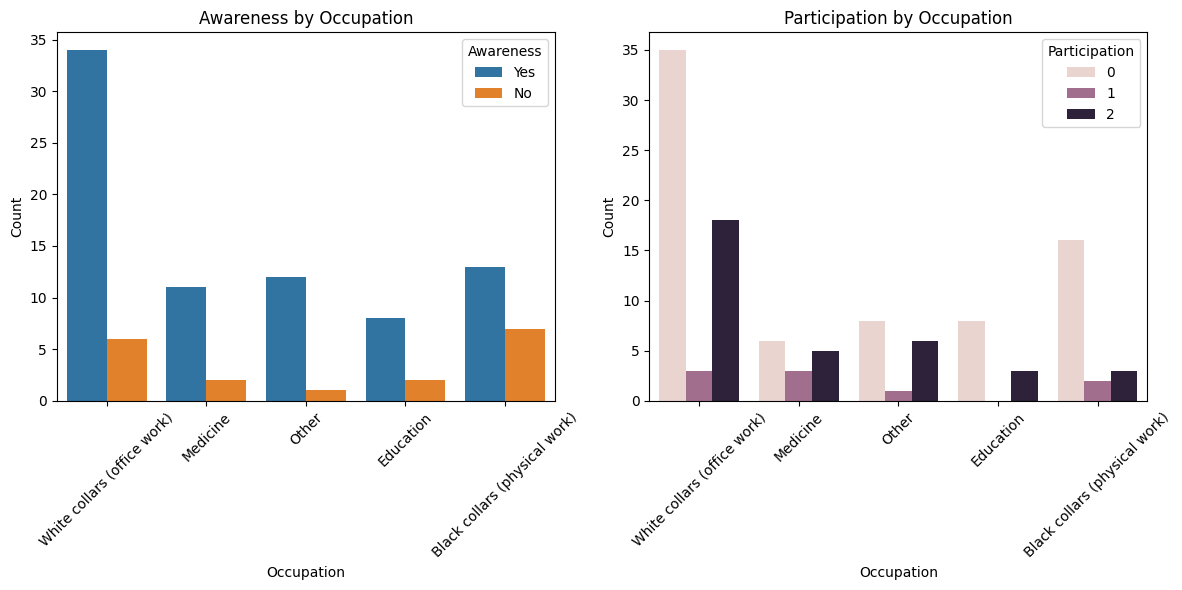

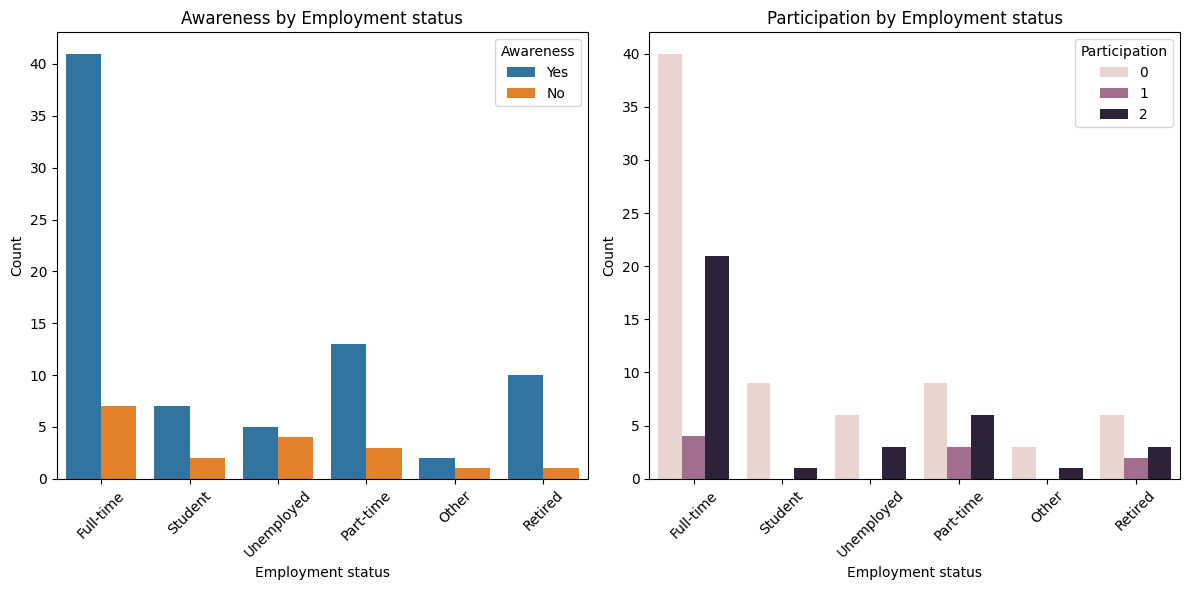

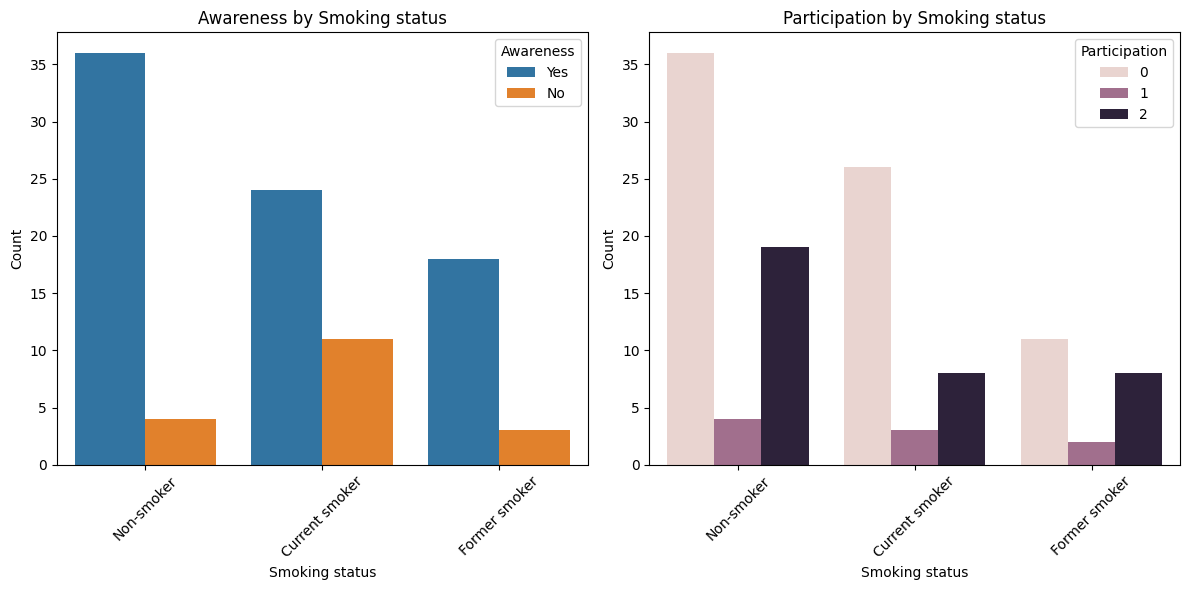

/var/folders/00/g6wzklhx6nj9649_f1shk6lc0000gp/T/ipykernel_32765/80319664.py:64: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


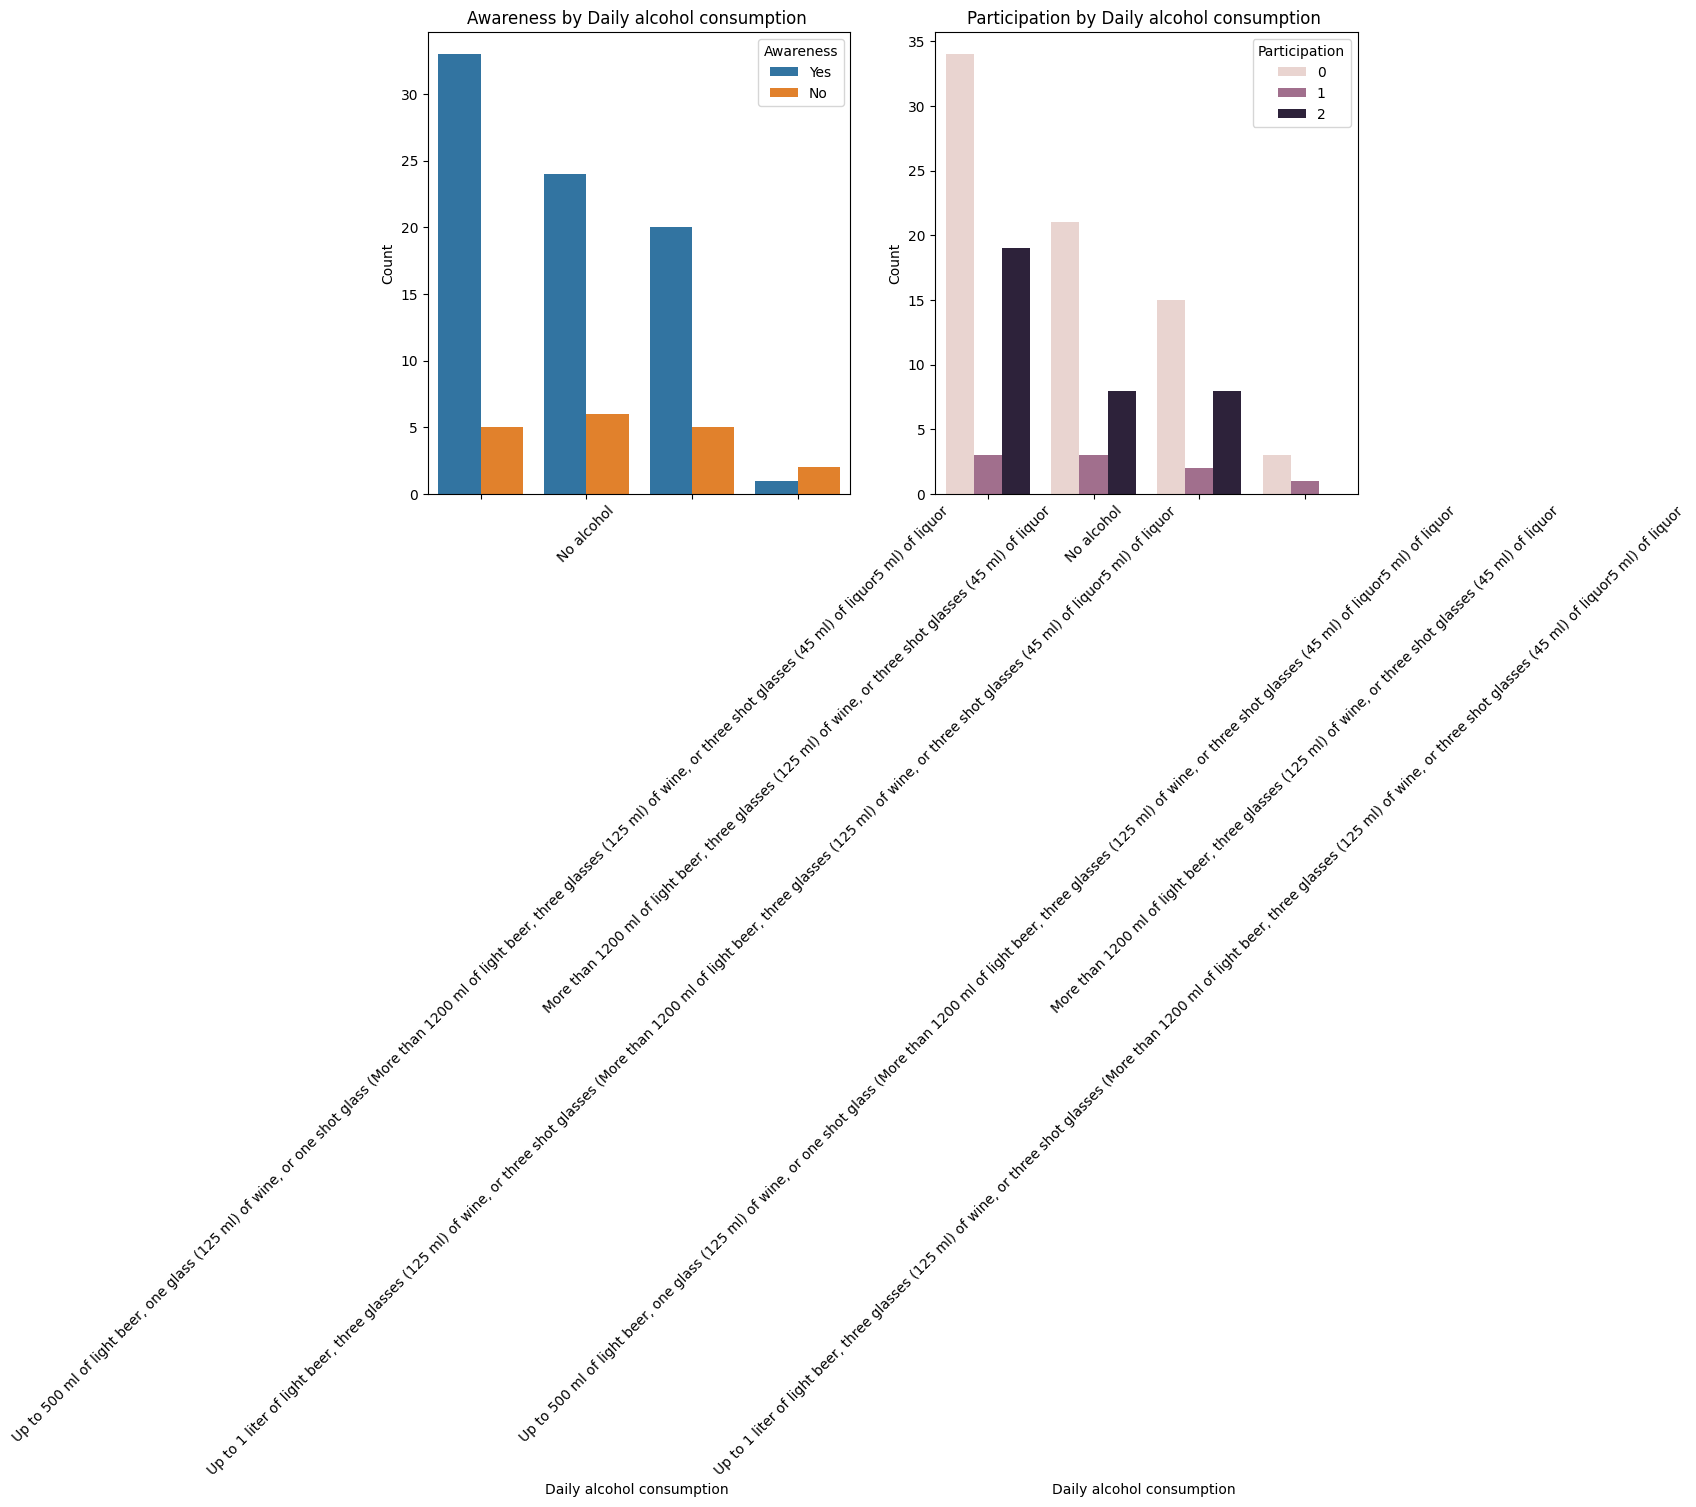

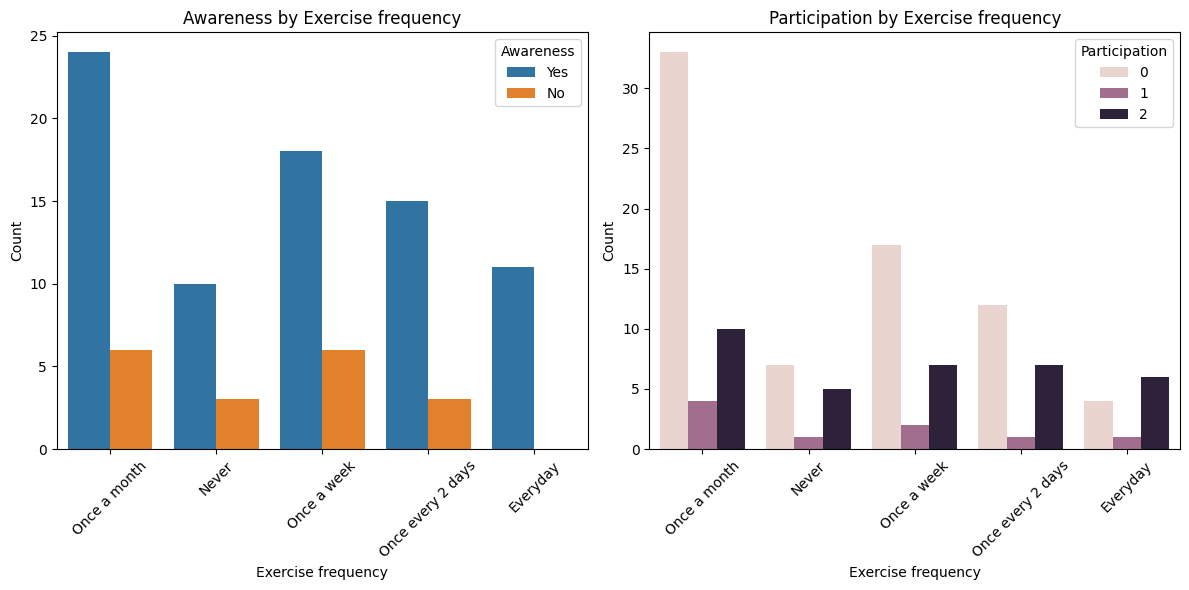

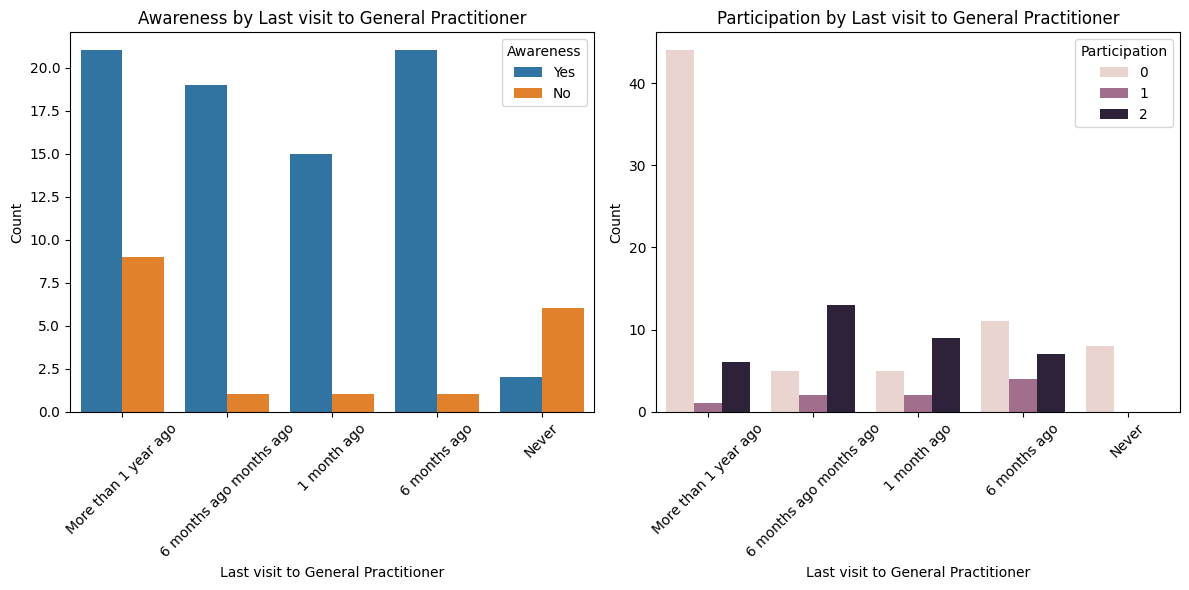

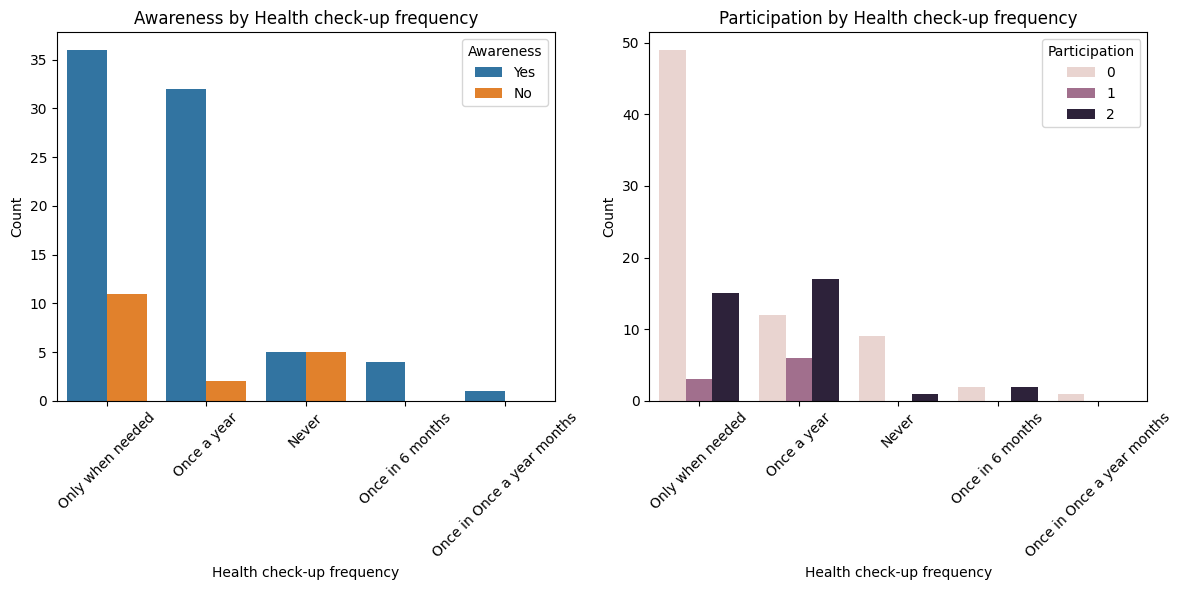

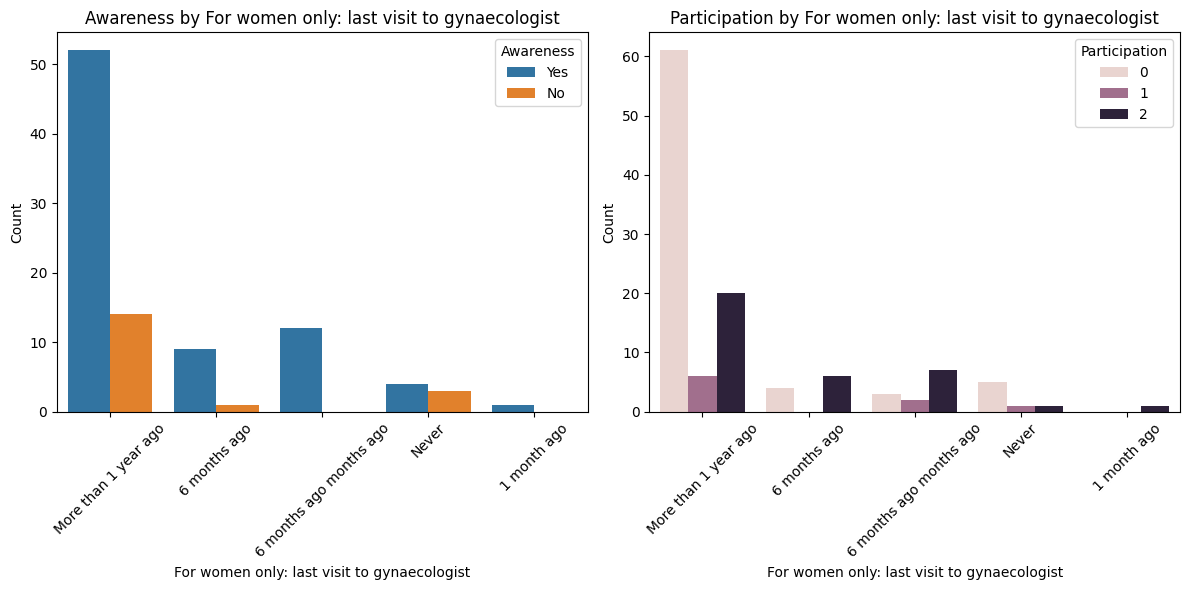

ValueError: too many values to unpack (expected 2)

In [ ]:
# Do sociodemographic factors affect the attitude towards screening and participation in screenings in Latvia? 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Load the cleaned dataset
df = pd.read_csv('cleaned_data.csv')

# Select relevant columns for analysis
relevant_columns = ['Age', 
                    'Gender', 
                    'City/town/village', 
                    'Marital Status', 
                    'Number of children', 
                    'Highest level of school completed', 
                    'Occupation', 
                    'Employment status', 
                    'Smoking status', 
                    'Daily alcohol consumption ', 
                    'Exercise frequency', 
                    'Last visit to General Practitioner', 
                    'Health check-up frequency', 
                    'For women only: last visit to gynaecologist', 
                    'Familiarity with the concept of cancer screening in Latvia', 
                    'If you received one of the invitations mentioned above, did you perform the screening that you were invited for? ']

data = df[relevant_columns]

# Map the participation column
def map_participation(entry):
    if entry == 'Yes - for all the screenings that I received the invitations':
        return 2
    elif entry == 'Yes for a part of screenings that I received the invitations':
        return 1
    else:
        return 0

data['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '] = data['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].map(map_participation)

# Visualize attitudes towards screening and participation by sociodemographic factors
def visualize_attitudes_and_participation():
    # Loop through each relevant column
    for column in data.columns[:-2]:  # Exclude the last two columns (awareness and participation)
        plt.figure(figsize=(12, 6))
        
        # Plot awareness by sociodemographic factor
        plt.subplot(1, 2, 1)
        sns.countplot(x=column, hue='Familiarity with the concept of cancer screening in Latvia', data=data)
        plt.title(f'Awareness by {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.legend(title='Awareness')
        plt.xticks(rotation=45)

        # Plot participation by sociodemographic factor
        plt.subplot(1, 2, 2)
        sns.countplot(x=column, hue='If you received one of the invitations mentioned above, did you perform the screening that you were invited for? ', data=data)
        plt.title(f'Participation by {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.legend(title='Participation')
        plt.xticks(rotation=45)

        plt.tight_layout()
        plt.show()

# Statistical Analysis
def statistical_analysis():
    # Conduct chi-square tests for awareness and participation
    chi2_awareness, p_awareness = chi2_contingency(pd.crosstab(data['Gender'], data['Familiarity with the concept of cancer screening in Latvia']))
    chi2_participation, p_participation = chi2_contingency(pd.crosstab(data['Gender'], data['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? ']))

    print("Chi-square test results for Awareness:")
    print("Chi-square value:", chi2_awareness)
    print("p-value:", p_awareness)

    print("\nChi-square test results for Participation:")
    print("Chi-square value:", chi2_participation)
    print("p-value:", p_participation)

# Call the functions
visualize_attitudes_and_participation()
statistical_analysis()



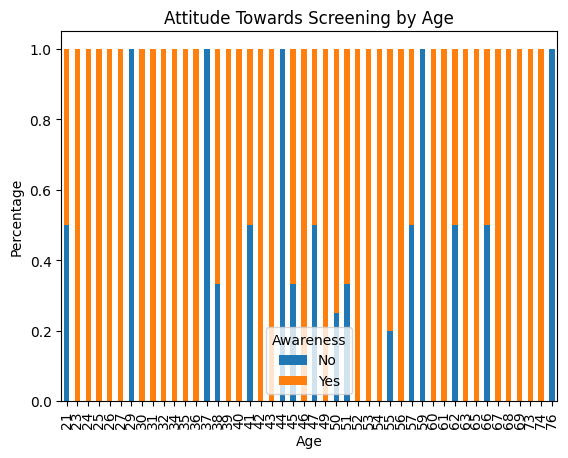

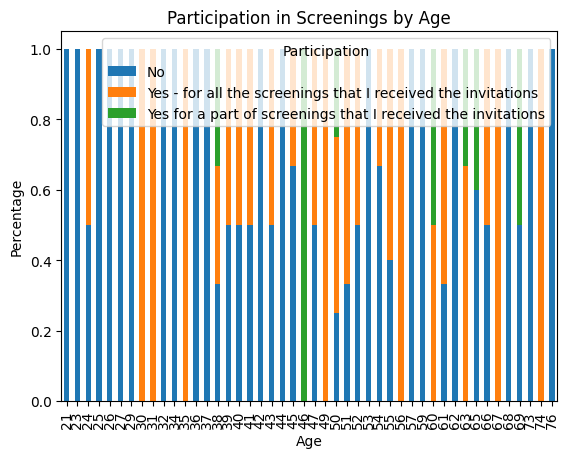

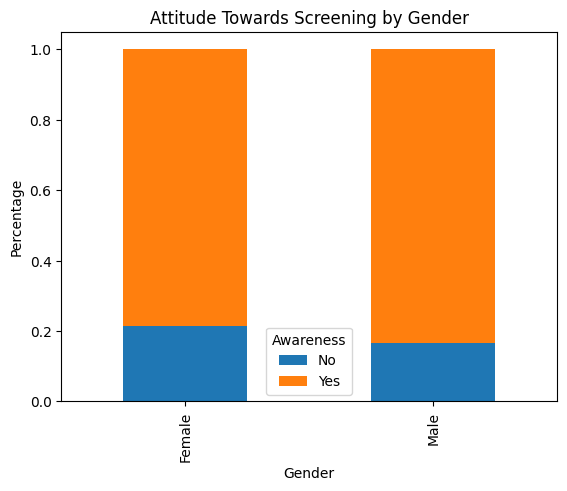

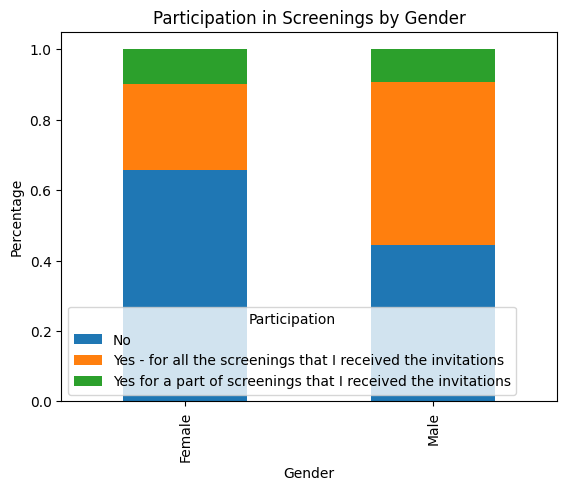

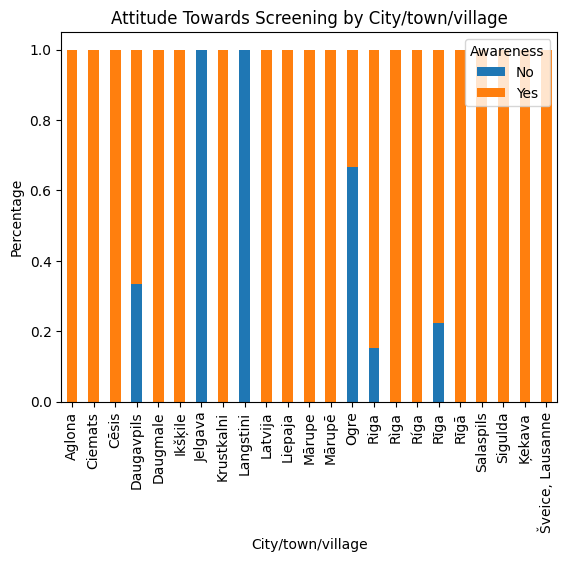

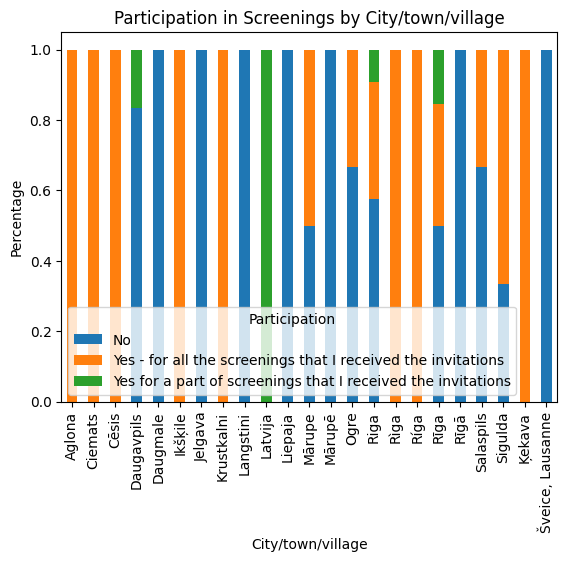

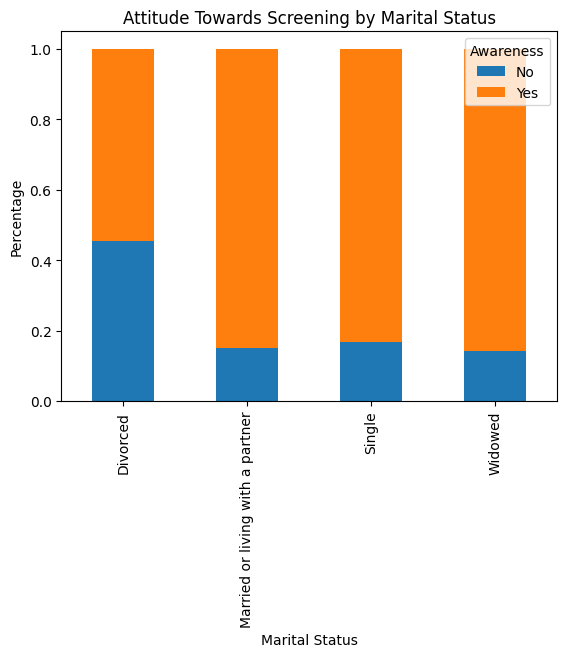

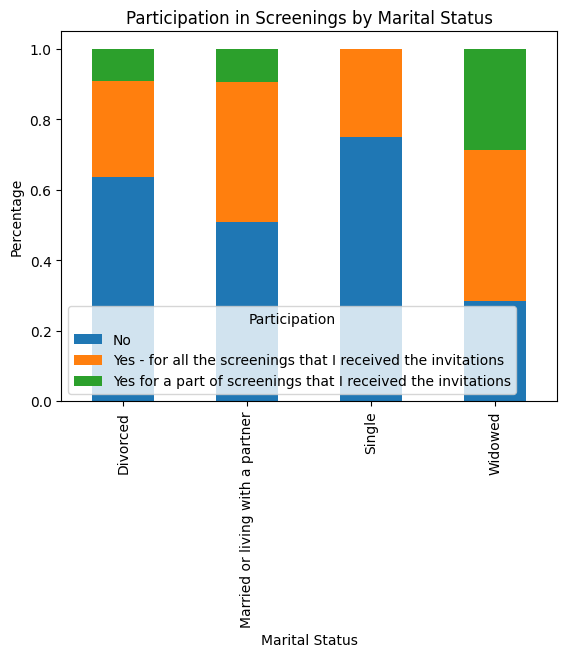

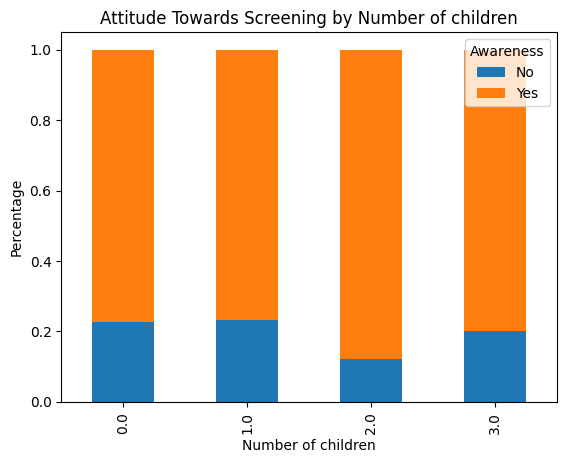

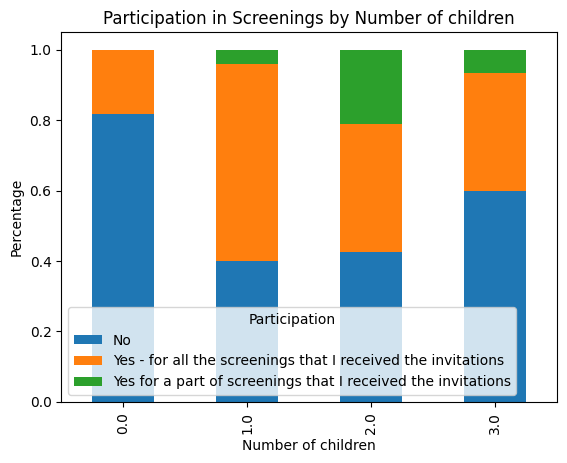

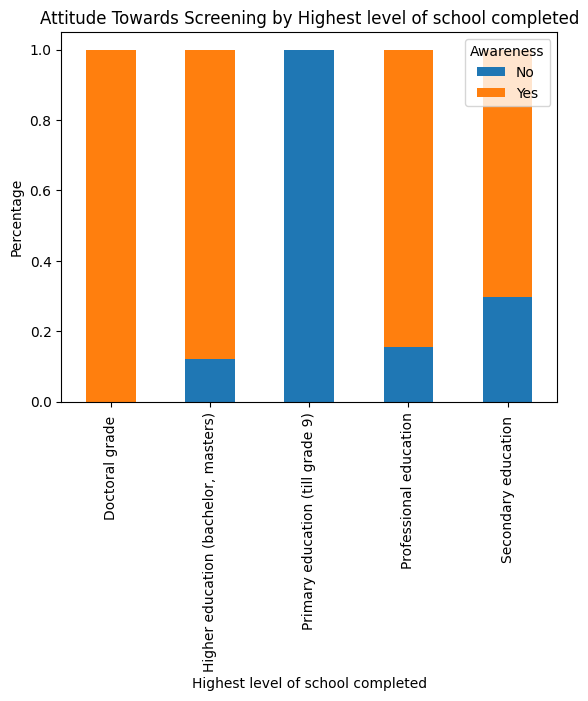

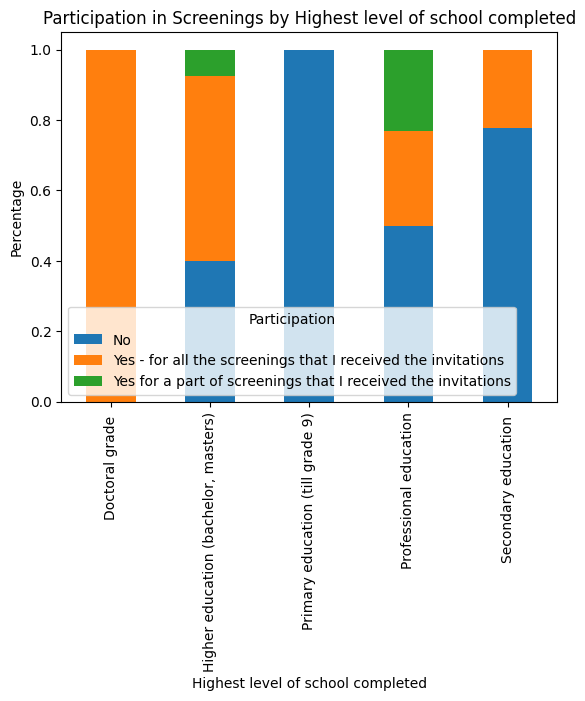

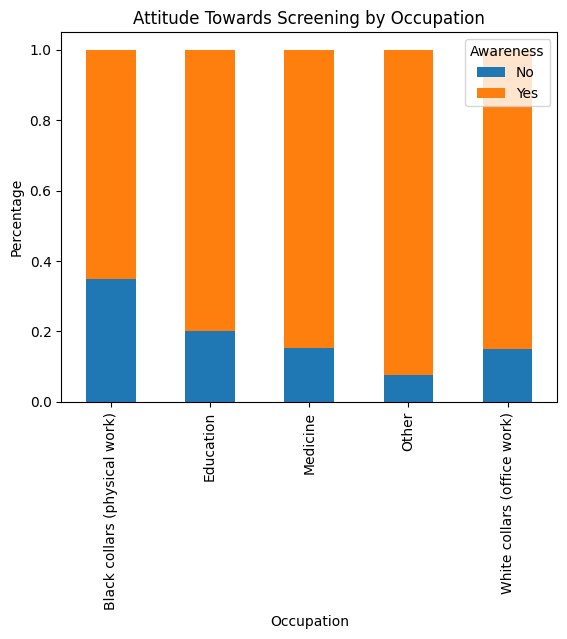

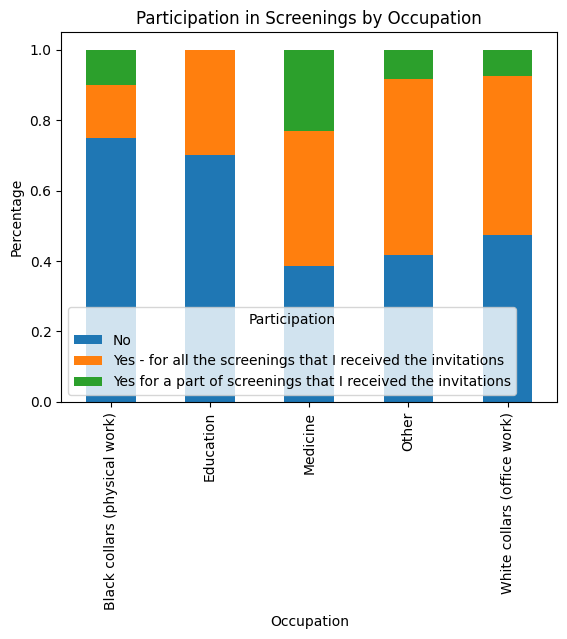

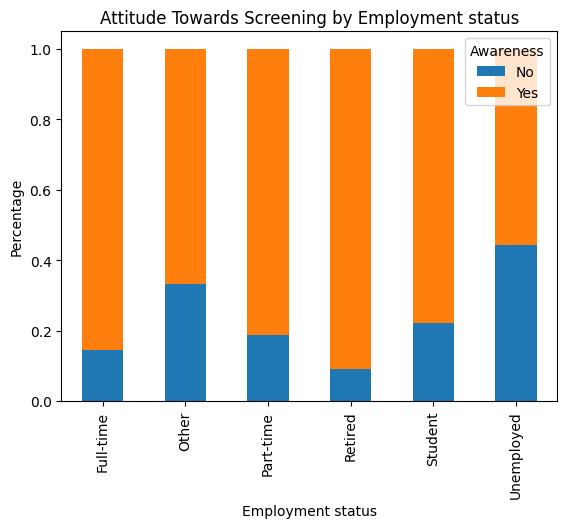

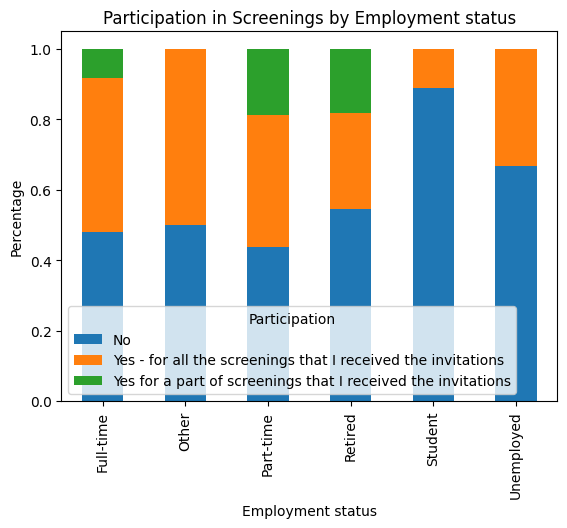

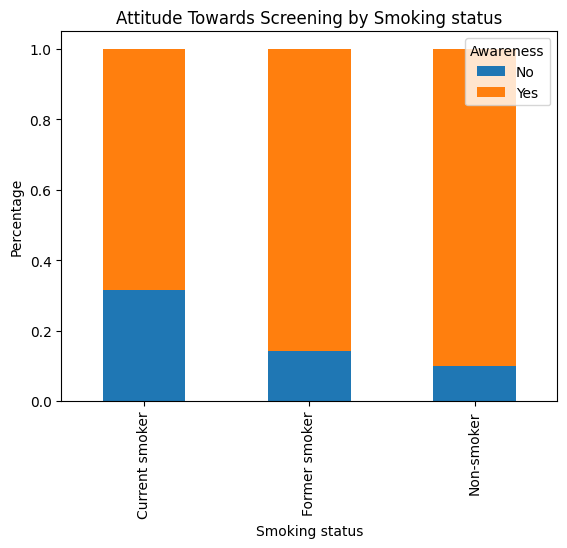

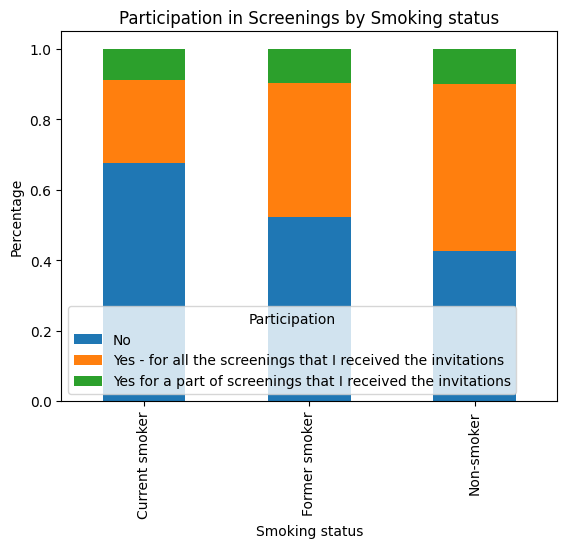

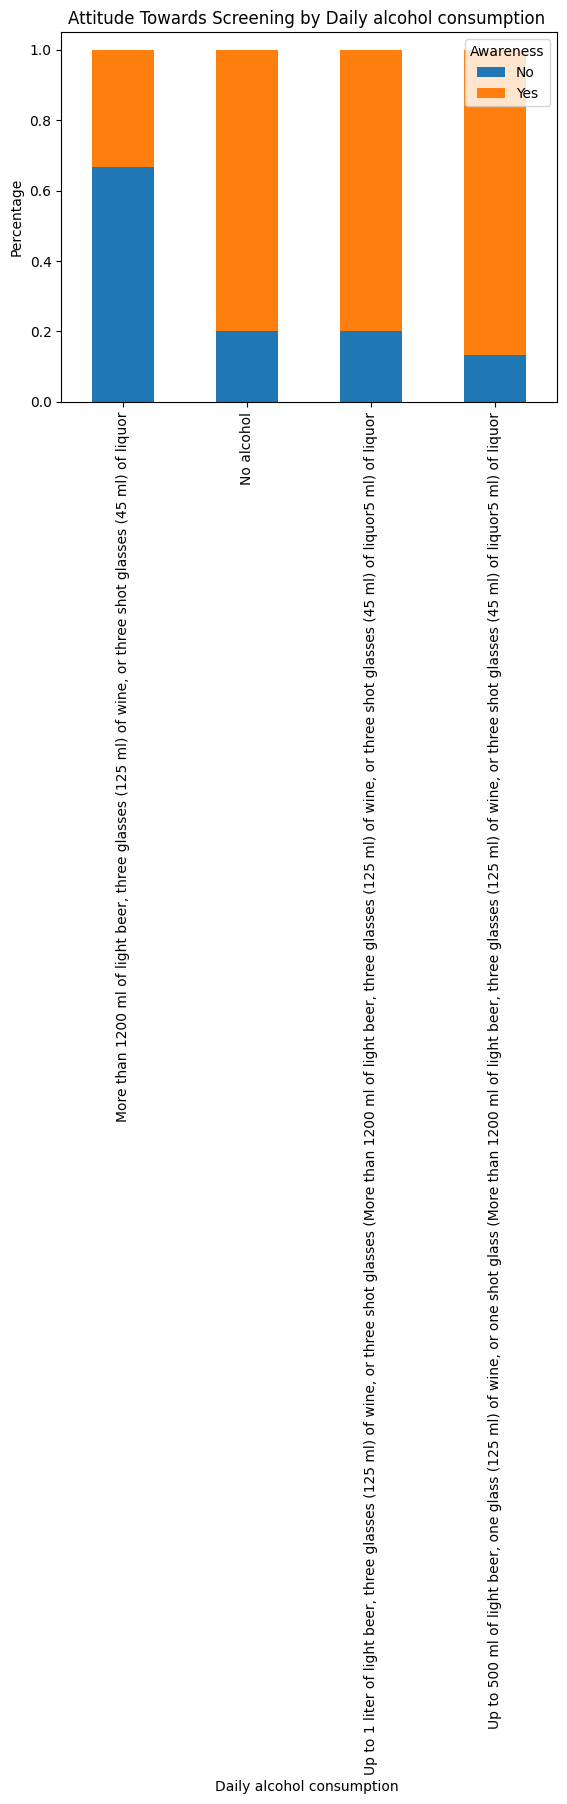

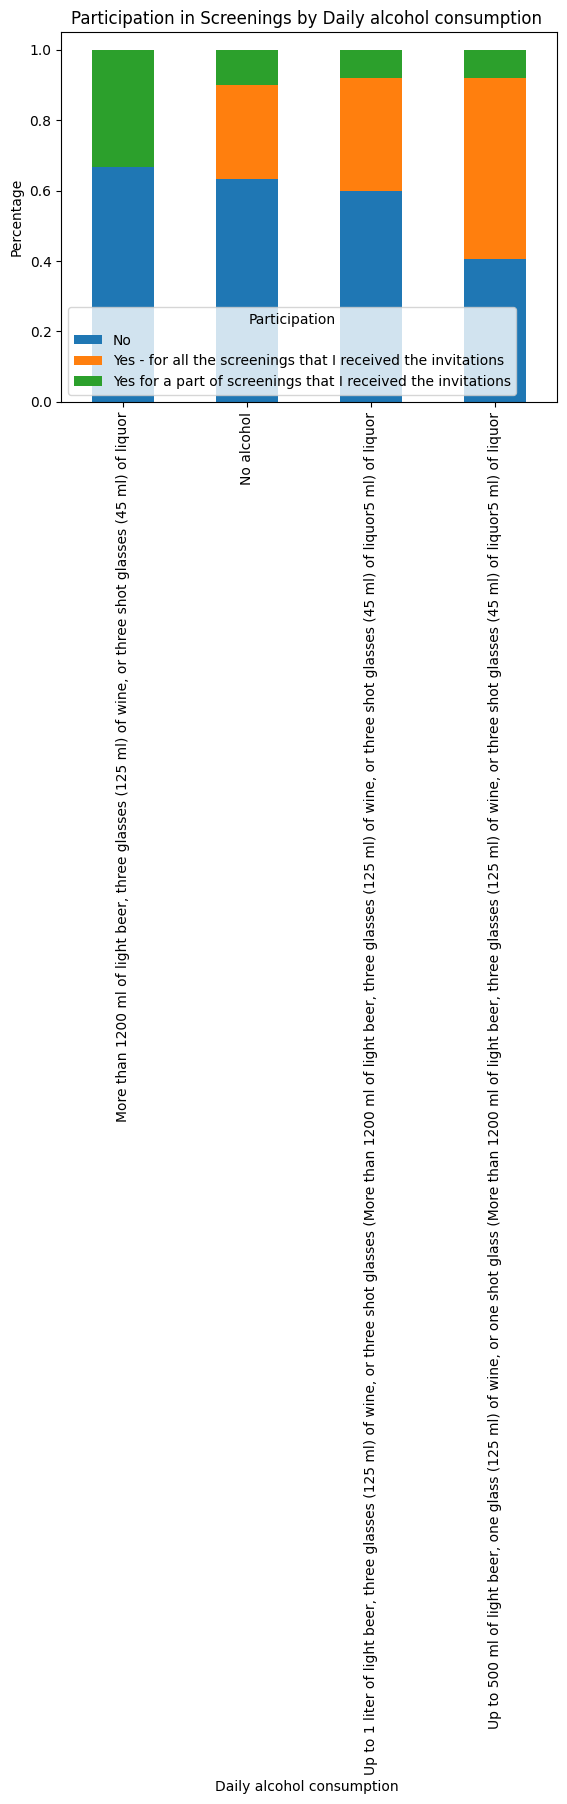

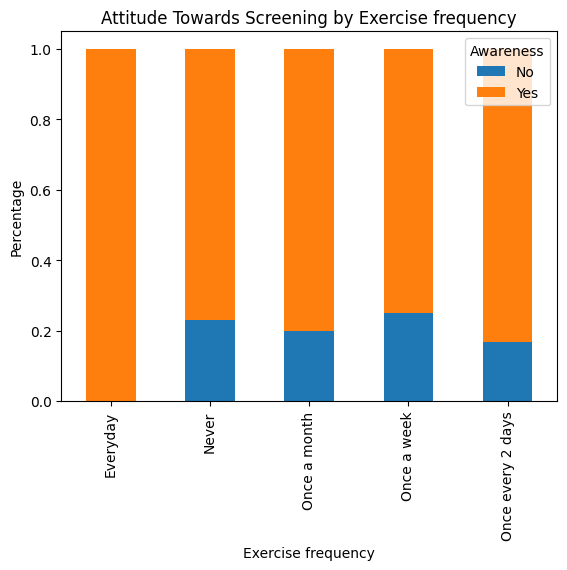

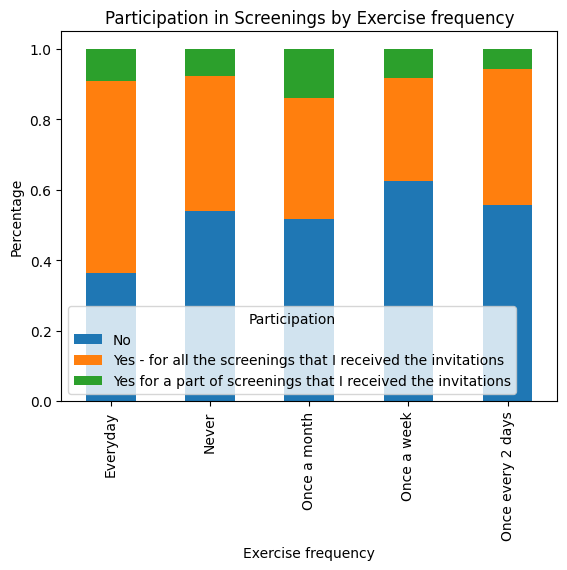

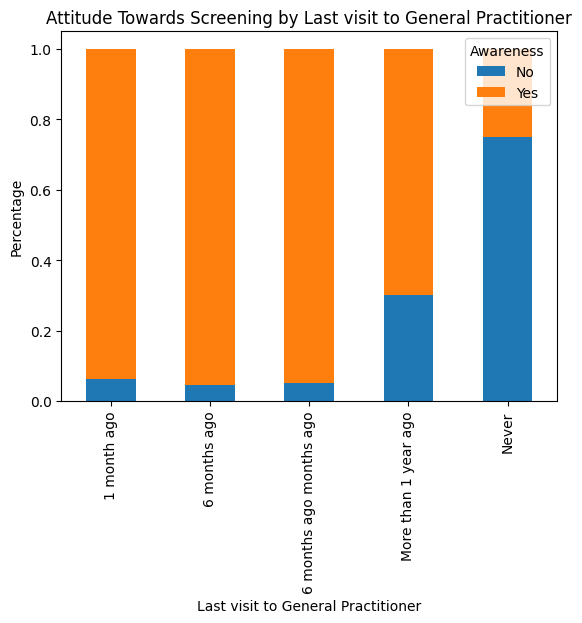

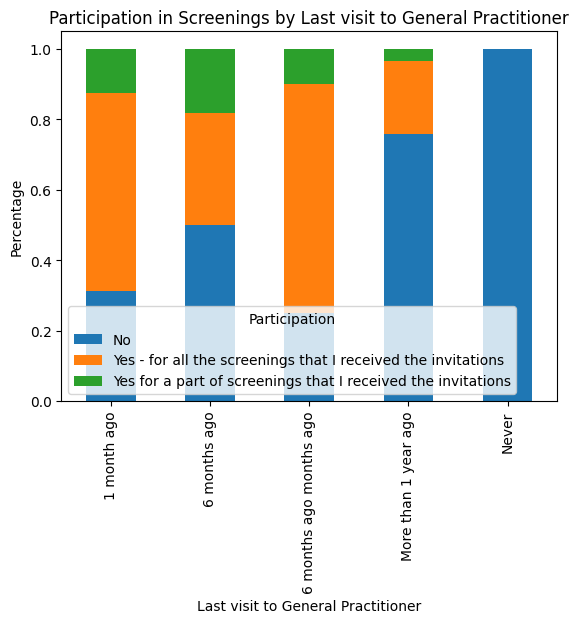

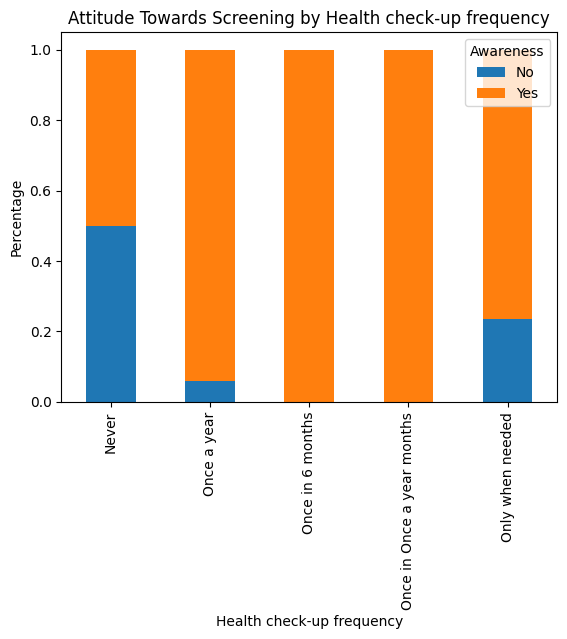

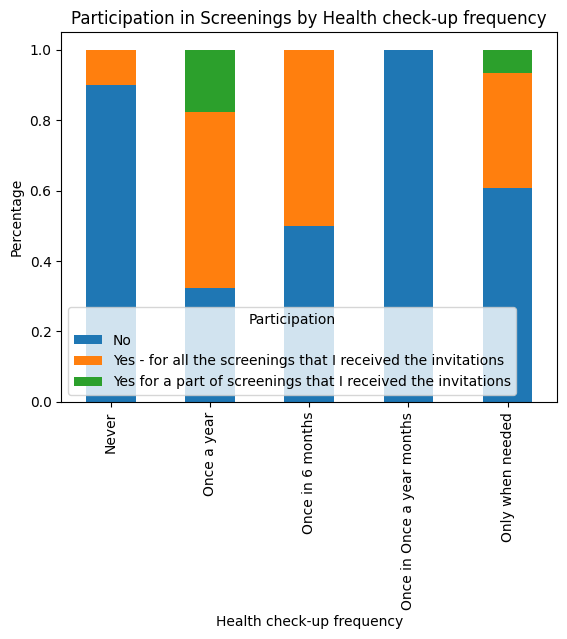

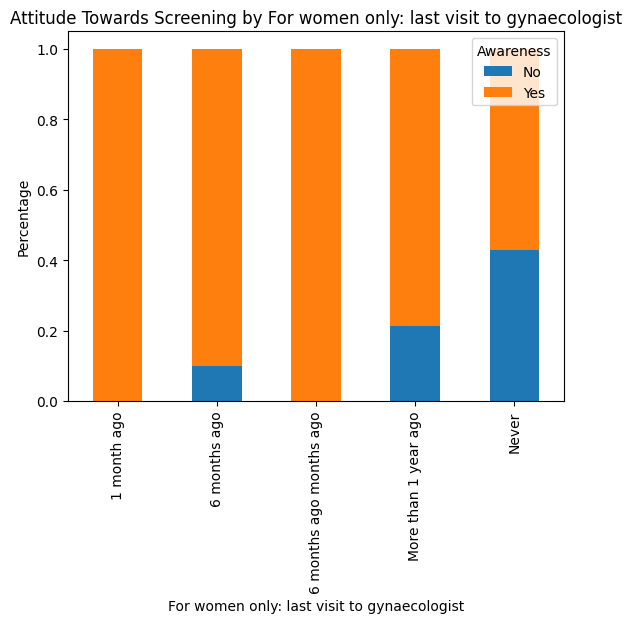

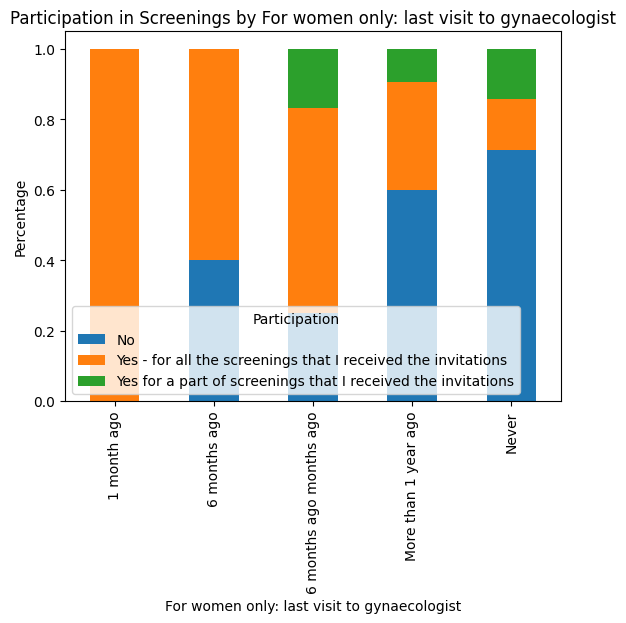

ValueError: too many values to unpack (expected 2)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Load the dataset
data = pd.read_csv('cleaned_data.csv')

# Define the sociodemographic factors of interest
sociodemographic_factors = [
    'Age',
    'Gender',
    'City/town/village',
    'Marital Status',
    'Number of children',
    'Highest level of school completed',
    'Occupation',
    'Employment status',
    'Smoking status',
    'Daily alcohol consumption ',
    'Exercise frequency',
    'Last visit to General Practitioner',
    'Health check-up frequency',
    'For women only: last visit to gynaecologist'
]

# Analyze Attitude Towards Screening
def analyze_attitude_towards_screening(factor):
    # Calculate the distribution of attitudes towards screening
    distribution = data.groupby(factor)['Familiarity with the concept of cancer screening in Latvia'].value_counts(normalize=True).unstack()

    # Visualize the distribution
    distribution.plot(kind='bar', stacked=True)
    plt.title('Attitude Towards Screening by ' + factor)
    plt.xlabel(factor)
    plt.ylabel('Percentage')
    plt.legend(title='Awareness')
    plt.show()

# Analyze Participation in Screenings
def analyze_participation_in_screenings(factor):
    # Calculate the distribution of participation in screenings
    distribution = data.groupby(factor)['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].value_counts(normalize=True).unstack()

    # Visualize the distribution
    distribution.plot(kind='bar', stacked=True)
    plt.title('Participation in Screenings by ' + factor)
    plt.xlabel(factor)
    plt.ylabel('Percentage')
    plt.legend(title='Participation')
    plt.show()

# Statistical Analysis
def statistical_analysis():
    for factor in sociodemographic_factors:
        # Conduct chi-square tests for awareness and participation
        chi2_awareness, p_awareness = chi2_contingency(pd.crosstab(data[factor], data['Familiarity with the concept of cancer screening in Latvia']))
        chi2_participation, p_participation = chi2_contingency(pd.crosstab(data[factor], data['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? ']))

        print("\nStatistical Analysis for", factor)
        print("Chi-square test results for Awareness:")
        print("Chi-square value:", chi2_awareness)
        print("p-value:", p_awareness)

        print("\nChi-square test results for Participation:")
        print("Chi-square value:", chi2_participation)
        print("p-value:", p_participation)

# Perform analysis and statistical tests for each sociodemographic factor
for factor in sociodemographic_factors:
    analyze_attitude_towards_screening(factor)
    analyze_participation_in_screenings(factor)

# Call the statistical_analysis function
statistical_analysis()


# SETTING UP AND ANALYSING HYPOTHESIS 

# HYPOTHESIS 1 
# Awareness about state-funded cancer screenings increases attendance rates of the population in screenings. 

In [ ]:
all_columns = df.columns.tolist()
print(all_columns)

['Country Code', 'Region', 'Age', ' Established diagnosis of breast cancer, cervical cancer, colorectal cancer, prostate cancer', 'Gender', 'City/town/village', 'Marital Status', 'Number of children', 'Highest level of school completed', 'Occupation', 'Employment status', 'Smoking status', 'Daily alcohol consumption ', 'Exercise frequency', 'Knowledge of General Practitioner', 'Last visit to General Practitioner', 'Health check-up frequency', 'For women only: last visit to gynaecologist', 'Familiarity with the concept of cancer screening in Latvia', 'Awareness about screening for cervical cancer (PAP smear)', 'Awareness about screening for colorectal cancer (blood in faeces)', ' Awareness about screening for breast cancer (Mammography)', 'Awareness about screening for prostate cancer (PSA analysis) ', 'Awareness about screening for Colonoscopy', 'Awareness about Prostate examination ', 'No Awareness about any type of cancer screening', 'Attended screening for cervical cancer (PAP smear

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset
df = pd.read_csv('cleaned_data.csv')

# Relevant columns
awareness_columns = ['Familiarity with the concept of cancer screening in Latvia',
                     'Awareness about screening for cervical cancer (PAP smear)',
                     'Awareness about screening for colorectal cancer (blood in faeces)',
                     ' Awareness about screening for breast cancer (Mammography)',
                     'Awareness about screening for prostate cancer (PSA analysis) ',
                     'Awareness about screening for Colonoscopy',
                     'Awareness about Prostate examination ',
                     'No Awareness about any type of cancer screening']

learning_sources_columns = ['Learnt about canceer screening tests from the Internet- Self-seeking information ',
                            'Learnt about canceer screening tests from social media ',
                            'Learnt about canceer screening tests from SPKC webpage',
                            'Learnt about canceer screening tests by my GP ',
                            'Learnt about canceer screening tests by other healthcare organisations',
                            'Learnt about canceer screening tests from advertisements ', 
                            'Learnt about canceer screening tests from friends, family members',
                            'Learnt about canceer screening tests from other resources '
                            ]

participation_column = 'If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '

attitudes_columns = ['My health and well-being is very important to me',
                     'I take precautions to have a healthy lifestyle',
                     'Cancer is a serious health condition',
                     'I am afraid of cancer ',
                     'I am concerned about my own risk to develop cancer ',
                     'I am concerned about my family\'s risk to develop cancer']

# Fill NaN values in participation_column with 'No'
df[participation_column].fillna('No', inplace=True)

# Map participation_column to binary values
df[participation_column] = df[participation_column].map({
    'Yes - for all the screenings that I received the invitations': 1,
    'Yes for a part of screenings that I received the invitations': 1,
    'No': 0
})

# Generate design matrix
X = df[awareness_columns + learning_sources_columns + attitudes_columns]
y = df[participation_column]

# Convert 'Yes' entries to 1 and fill NaN with 0
X = X.applymap(lambda x: 1 if x == 'Yes' else 0)

# Remove constant columns to avoid singularity
X = X.loc[:, (X != X.iloc[0]).any()]

# Add constant for logistic regression
X = sm.add_constant(X)

# Fit logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print summary of the model
print(result.summary())

         Current function value: 0.268551
         Iterations: 35
                                                                           Logit Regression Results                                                                          
Dep. Variable:     If you received one of the invitations mentioned above, did you perform the screening that you were invited for?    No. Observations:                  117
Model:                                                                                                                         Logit   Df Residuals:                      100
Method:                                                                                                                          MLE   Df Model:                           16
Date:                                                                                                               Thu, 25 Apr 2024   Pseudo R-squ.:                  0.5944
Time:                                                           

/var/folders/00/g6wzklhx6nj9649_f1shk6lc0000gp/T/ipykernel_33796/3018324975.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[participation_column].fillna('No', inplace=True)
/var/folders/00/g6wzklhx6nj9649_f1shk6lc0000gp/T/ipykernel_33796/3018324975.py:51: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = X.applymap(lambda x: 1 if x == 'Yes' else 0)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maxi

Based on the output and the inferences drawn:

Rejecting the Null Hypothesis: We reject the null hypothesis, which typically states that there is no relationship between awareness about state-funded cancer screenings and attendance rates.
Basis for Rejection:
The significant positive coefficients associated with awareness variables indicate that an increase in awareness is associated with higher attendance rates.
The low p-values associated with these coefficients suggest that the relationships are statistically significant, meaning they are unlikely to have occurred by chance.
Conclusion: Therefore, based on the evidence provided by the logistic regression analysis, we have sufficient grounds to reject the null hypothesis and accept the alternative hypothesis. This implies that awareness about state-funded cancer screenings does have a significant impact on attendance rates in the population.

# HYPOTHESIS 2
# Females are more aware than men of state-funded cancer screenings and attend them more frequently than men. 

In [73]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the dataset
df = pd.read_csv('cleaned_data.csv')

awareness_columns = ['Familiarity with the concept of cancer screening in Latvia',
                     'Awareness about screening for cervical cancer (PAP smear)',
                     'Awareness about screening for colorectal cancer (blood in faeces)',
                     ' Awareness about screening for breast cancer (Mammography)',
                     'Awareness about screening for prostate cancer (PSA analysis) ',
                     'Awareness about screening for Colonoscopy',
                     'Awareness about Prostate examination ',
                     'No Awareness about any type of cancer screening']

participation_column = 'If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '

# Fill NaN values in participation_column with 'No'
df[participation_column].fillna('No', inplace=True)

# Map participation_column to binary values
df[participation_column] = df[participation_column].map({
    'Yes - for all the screenings that I received the invitations': 1,
    'Yes for a part of screenings that I received the invitations': 1,
    'No': 0
})

# Select only relevant columns for hypothesis testing
data = df[['Gender of the participant'] + awareness_columns]

# Drop rows with missing values
data.dropna(inplace=True)

# Check if there are any remaining rows after dropping missing values
if data.empty:
    print("No data remaining after dropping missing values. Unable to perform analysis.")
else:
    # Create contingency table
    contingency_table = pd.crosstab(data['Gender of the participant'], data[awareness_columns])

    # Perform chi-square test of independence
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Set significance level
    alpha = 0.05

    # Print results
    print("Chi-Square Statistic:", chi2)
    print("p-value:", p)

    if p < alpha:
        print("Reject the null hypothesis: There is a significant association between gender and awareness of state-funded cancer screenings.")
    else:
        print("Accept the null hypothesis: There is no significant association between gender and awareness of state-funded cancer screenings.")

No data remaining after dropping missing values. Unable to perform analysis.


/var/folders/00/g6wzklhx6nj9649_f1shk6lc0000gp/T/ipykernel_33796/3938656928.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[participation_column].fillna('No', inplace=True)
/var/folders/00/g6wzklhx6nj9649_f1shk6lc0000gp/T/ipykernel_33796/3938656928.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
